In [708]:
import numpy as np
import pandas as pd
import glob
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests
from matplotlib_venn import venn3
from matplotlib.patches import Patch
import matplotlib.ticker as ticker
from scipy.stats import ttest_ind
from itertools import combinations
from scipy.spatial.distance import euclidean
from scipy.stats import sem



import boris_extraction as boris
import multirecording_spikeanalysis as spike

In [618]:
#open boris excel

# Full path example
file_path = r'C:\Users\anate\BORISfiles\24_nov_BORIS_real.tsv'

folder_path1 = glob.glob(r"C:\Users\anate\ToAnalyze\*\*\*aggregated.csv")
folder_path2 = glob.glob(r"C:\Users\anate\ToAnalyze\*\*\*aggregated.tsv")
folder_path = folder_path1 + folder_path2

def behav_times(dataframe, dict):
    transitionTimes = ['mice back in vs mice taken out']
    takenOut = ['mice taken out']
    subjects = ['subject', 'social_agent vs No focal subject']
    justSub = ['subject']
    allSniff = ['facial sniffing vs anogenital sniffing']

    putInTimes = boris.get_behavior_bouts(dataframe, subjects, transitionTimes, 0, 0)
    if(dataframe.name[29:35] == "21_nov"):
        #print("found!!!!! 21_nov")
        putInTimes = np.array(putInTimes) * 2
    

    exp1StartTime = putInTimes[0][1]
    exp1EndTime = putInTimes[1][1]
    exp2StartTime = putInTimes[2][1]
    exp2EndTime = putInTimes[3][1]
    exp3StartTime = putInTimes[4][1]
    exp3EndTime = putInTimes[5][1]
    exp4StartTime = putInTimes[6][1]
    exp4EndTime = putInTimes[7][1]
    exp5StartTime = putInTimes[8][1]
    #print(putInTimes)

    #then make individual dictionaries that are mapped to each one
    for item in df_list:
        allSniffBoutsSub = boris.get_behavior_bouts(dataframe, justSub, allSniff, 1, 0.5)
    #print(allSniffBoutsSub.shape)
    if(dataframe.name[29:35] == "21_nov"):
        #print("found!!!!! 21_nov")
        allSniffBoutsSub = np.array(allSniffBoutsSub) * 2
    sniffExp1Sub = allSniffBoutsSub[(allSniffBoutsSub[:,0] > exp1StartTime) & (allSniffBoutsSub[:,0] < exp1EndTime)]
    sniffExp2Sub = allSniffBoutsSub[(allSniffBoutsSub[:,0] > exp2StartTime) & (allSniffBoutsSub[:,0] < exp2EndTime)]
    sniffExp3Sub = allSniffBoutsSub[(allSniffBoutsSub[:,0] > exp3StartTime) & (allSniffBoutsSub[:,0] < exp3EndTime)]
    sniffExp4Sub = allSniffBoutsSub[(allSniffBoutsSub[:,0] > exp4StartTime) & (allSniffBoutsSub[:,0] < exp4EndTime)]
    sniffExp5Sub = allSniffBoutsSub[allSniffBoutsSub[:,0] > exp5StartTime]

    #print(dataframe.name)
    #print(sniffExp1Sub.shape[0], sniffExp2Sub.shape[0], sniffExp3Sub.shape[0],sniffExp4Sub.shape[0], sniffExp5Sub.shape[0], sep = ',')

    dictSniffSub = {'A1': sniffExp1Sub, 'A2': sniffExp2Sub, 'A3': sniffExp3Sub,'A4': sniffExp4Sub, 'B1': sniffExp5Sub}

    #print(dataframe.name[29])
    #print(dataframe.name[30:37])
    if dataframe.name[29] == "\\":
        dict[dataframe.name[30:37]] = dictSniffSub
        
    else:
        dict[dataframe.name[29:35]] = dictSniffSub
    #makes a dictionary with a dictionary as its value

    return dict

dictOfBoris={}
df_list =[]
for file_path in folder_path:
    try:
        if file_path.endswith('.csv'):
            phase1_df = pd.read_csv(file_path)
        elif file_path.endswith('.tsv'):
            phase1_df = pd.read_csv(file_path, sep='\t')
        df_list.append(phase1_df)
        phase1_df.name = file_path
        dictOfBoris = behav_times(phase1_df, dictOfBoris)

    except pd.errors.EmptyDataError:
        # Handle empty Excel files if needed
        print(f"Empty file: {file_path}")
    except Exception as e:
        # Handle other exceptions
        print(f"Error reading {file_path}: {e}")


# above code copied and modified from "phase1.ipynb" in Sequioa's folder
#print(len(dictOfBoris))
#print(folder_path)
#print(len(dictOfBoris['C:\\Users\\anate\\ToAnalyze\\11_cage_p1_merged.rec\\11_cage_p1_aggregated.tsv']))


#example to access specific time element
#dict[key][key of dict2 inside dict][the first array][the first element of the first array]
#dictOfBoris['C:\\Users\\anate\\ToAnalyze\\11_cage_p1_merged.rec\\11_cage_p1_aggregated.tsv']['sniffExp1Sub'][0][0]

# Iterate through the list and print column titles for each DataFrame


#I now have a list of dataframes

Total num of Nov animals:  10
Total num of Cage animals:  11


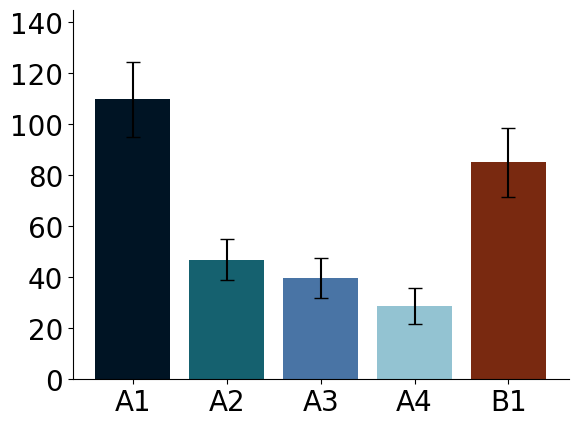

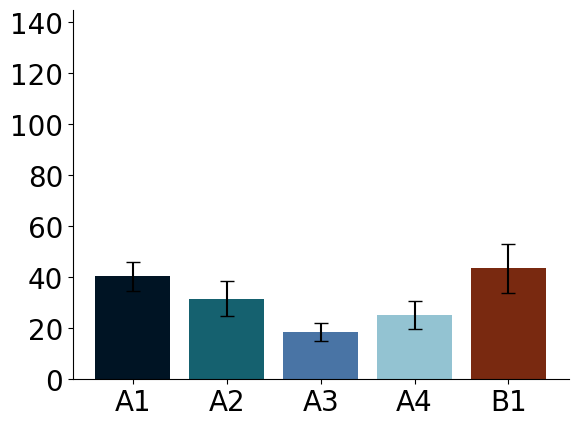

In [647]:
#prior set should have created the dicitonary of BORIS files
#this set will get behavioral data


dictInvest = {}
dictOfTotalInvestNov = {}
dictOfTotalInvestCage = {}
totalNov = [0, 0, 0, 0, 0]
avgsNov = []
avgsCage = []
totalCage = [0, 0, 0, 0, 0]
def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

#[11_Cage]: [exp1, exp4, exp5]; [11_nov]

def totalInvest(dict):
    totalSniff1 = 0
    totalSniff2 = 0
    totalSniff3 = 0
    totalSniff4 = 0
    totalSniff5 = 0
    for i in range(len(dict['A1'])):
        #for each array of sniffs in this exposure...
        totalSniff1 += dict['A1'][i][1] - dict['A1'][i][0]
        #print(dict['A1'][i])
        # print(dict['A1'][i][1])
        # print(dict['A1'][i][0])
        #print(totalSniff1)
    for i in range(len(dict['A2'])):
        #for each array of sniffs in this exposure...
        totalSniff2 += dict['A2'][i][1] - dict['A2'][i][0]
    for i in range(len(dict['A3'])):
        #for each array of sniffs in this exposure...
        totalSniff3 += dict['A3'][i][1] - dict['A3'][i][0]
    for i in range(len(dict['A4'])):
        #for each array of sniffs in this exposure...
        totalSniff4 += dict['A4'][i][1] - dict['A4'][i][0]
    for i in range(len(dict['B1'])):
        #for each array of sniffs in this exposure...
        totalSniff5 += dict['B1'][i][1] - dict['B1'][i][0]
    
    return [totalSniff1, totalSniff2, totalSniff3, totalSniff4, totalSniff5]
    

def getmsems(allExp1, allExp2, allExp3, allExp4, allExp5):

    sems = [stats.sem(allExp1), stats.sem(allExp2), stats.sem(allExp3), stats.sem(allExp4), stats.sem(allExp5)]

    return sems

def getavgbouts(dict, key):
    #print(dict)
    avgExp1Bout = 0
    avgExp2Bout = 0
    avgExp3Bout = 0
    avgExp4Bout = 0
    avgExp5Bout = 0
    avgExp1Bout = dict[0] / len(dictOfBoris[key]['A1'])
    avgExp2Bout = dict[1] / len(dictOfBoris[key]['A2'])
    avgExp3Bout = dict[2] / len(dictOfBoris[key]['A3'])
    avgExp4Bout = dict[3] / len(dictOfBoris[key]['A4'])
    avgExp5Bout = dict[4] / len(dictOfBoris[key]['B1'])

    return [avgExp1Bout, avgExp2Bout, avgExp3Bout, avgExp4Bout, avgExp5Bout]

dictOfAvgBoutNov = {}
dictOfAvgBoutCage = {}
for key in dictOfBoris:
    if key[-1] != 'e':
        dictOfTotalInvestNov[key] = totalInvest(dictOfBoris[key])
        #print(dictOfTotalInvestNov[key][0])
        #print(len(dictOfBoris[key]['A1']))

        #print(dictOfTotalInvestNov[key][0]/(len(dictOfBoris[key]['A1'])))
        dictOfAvgBoutNov[key] = getavgbouts(dictOfTotalInvestNov[key], key)
        #print(dictOfAvgBoutNov[key])
        #print(dictOfTotalInvestNov[key])
        #print(len(dictOfTotalInvestNov))
        #print(avgsNov)
        #print("updated: ", avgsNov)
#print(dictOfTotalInvestNov)

all_novs = np.stack(list(dictOfTotalInvestNov.values()))
#print(all_novs)
allExp1Novs = all_novs[:, 0]
#print(allExp1Novs)
allExp1Novs = np.array(allExp1Novs)/1000
allExp2Novs = all_novs[:, 1]
allExp2Novs = np.array(allExp2Novs)/1000
allExp3Novs = all_novs[:, 2]
allExp3Novs = np.array(allExp3Novs)/1000
allExp4Novs = all_novs[:, 3]
allExp4Novs = np.array(allExp4Novs)/1000
allExp5Novs = all_novs[:, 4]
allExp5Novs = np.array(allExp5Novs)/1000
avgsNovFR = np.mean(all_novs, axis = 0)
avgsNovFR = avgsNovFR / 1000
semsNov = getmsems(allExp1Novs, allExp2Novs, allExp3Novs, allExp4Novs, allExp5Novs)



for key in dictOfBoris:
    if key[-1] == 'e':
        dictOfTotalInvestCage[key] = totalInvest(dictOfBoris[key])
        dictOfAvgBoutCage[key] = getavgbouts(dictOfTotalInvestCage[key], key)

        #print(dictOfTotalInvestCage[key])
        #print(len(dictOfTotalInvestCage))
        #print(avgsCage)
        #print("updated: ", avgsCage)
all_cages = np.stack(list(dictOfTotalInvestCage.values()))
allExp1Cage = all_cages[:, 0]
allExp1Cage = np.array(allExp1Cage)/1000
allExp2Cage = all_cages[:, 1]
allExp2Cage = np.array(allExp2Cage)/1000
allExp3Cage = all_cages[:, 2]
allExp3Cage = np.array(allExp3Cage)/1000
allExp4Cage = all_cages[:, 3]
allExp4Cage = np.array(allExp4Cage)/1000
allExp5Cage = all_cages[:, 4]
allExp5Cage = np.array(allExp5Cage)/1000
avgsCageFR = np.mean(all_cages, axis = 0)
avgsCageFR = avgsCageFR / 1000
semsCage = getmsems(allExp1Cage, allExp2Cage, allExp3Cage, allExp4Cage, allExp5Cage)


print("Total num of Nov animals: ", len(dictOfTotalInvestNov))
print("Total num of Cage animals: ", len(dictOfTotalInvestCage))

# Data
colors = [hex_2_rgb('#001424'), hex_2_rgb('#15616F'), hex_2_rgb('#4974a5'), hex_2_rgb('#93C3D2'), hex_2_rgb('#792910')]
categories = ['A1', 'A2', 'A3', 'A4', 'B1']


# Create the bar graph
ax = plt.bar(categories, avgsNovFR, yerr=semsNov, capsize= 5, color=colors)

# Add labels and title
#plt.xlabel('Exposure Number')
plt.ylim(0, 145)
#plt.ylabel('Total Investigation Time (s)')
#plt.title('Novel', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()


plt.bar(categories, avgsCageFR, yerr=semsCage, capsize= 5, color = colors)

# Add labels and title
#plt.xlabel('Exposure Number')
plt.ylim(0, 145)
#plt.ylabel('Total Investigation Time (s)')
#plt.title('Cagemate', fontsize= 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()


In [620]:

# Create a DataFrame for easy management
data = pd.DataFrame({
    'A1': allExp1Novs,
    'A2': allExp2Novs,
    'A3': allExp3Novs,
    'A4': allExp4Novs,
    'B1': allExp5Novs
})

# List of Exp comparisons (pairs)
Exp_pairs = [
    ('A1', 'A2'),
    ('A1', 'A3'),
    ('A1', 'A4'),
    ('A1', 'B1'),
    ('A2', 'A3'),
    ('A2', 'A4'),
    ('A2', 'B1'),
    ('A3', 'A4'),
    ('A3', 'B1'),
    ('A4', 'B1')
]

# Store test results
results = []

# Perform paired t-tests for each Exp pair
for (g1, g2) in Exp_pairs:
    stat, p_value = ttest_rel(data[g1], data[g2])
    results.append({'A1': g1, 'A2': g2, 't-statistic': stat, 'p-value': p_value})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Apply Holm-Bonferroni correction
reject, adjusted_p_values, _, _ = multipletests(results_df['p-value'], method='holm')

# Add adjusted p-values to the results DataFrame
results_df['Adjusted p-value'] = adjusted_p_values
results_df['Reject Null'] = reject

# Display results
print(results_df)


   A1  A2  t-statistic   p-value  Adjusted p-value  Reject Null
0  A1  A2     5.661394  0.000309          0.002473         True
1  A1  A3     6.105090  0.000178          0.001603         True
2  A1  A4     6.235200  0.000152          0.001523         True
3  A1  B1     1.437655  0.184377          0.204993        False
4  A2  A3     1.817575  0.102497          0.204993        False
5  A2  A4     3.609436  0.005664          0.028321         True
6  A2  B1    -3.577817  0.005951          0.028321         True
7  A3  A4     2.761735  0.022049          0.066148        False
8  A3  B1    -4.290691  0.002018          0.012108         True
9  A4  B1    -5.113770  0.000633          0.004433         True


In [621]:
# Create a DataFrame for easy management
dataCage = pd.DataFrame({
    'A1': allExp1Cage,
    'A2': allExp2Cage,
    'A3': allExp3Cage,
    'A4': allExp4Cage,
    'B1': allExp5Cage
})

# List of Exp comparisons (pairs)
Exp_pairs = [
    ('A1', 'A2'),
    ('A1', 'A3'),
    ('A1', 'A4'),
    ('A1', 'B1'),
    ('A2', 'A3'),
    ('A2', 'A4'),
    ('A2', 'B1'),
    ('A3', 'A4'),
    ('A3', 'B1'),
    ('A4', 'B1')
]

# Store test results
results = []

# Perform paired t-tests for each Exp pair
for (g1, g2) in Exp_pairs:
    stat, p_value = ttest_rel(dataCage[g1], dataCage[g2])
    results.append({'A1': g1, 'A2': g2, 't-statistic': stat, 'p-value': p_value})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Apply Holm-Bonferroni correction
reject, adjusted_p_values, _, _ = multipletests(results_df['p-value'], method='holm')

# Add adjusted p-values to the results DataFrame
results_df['Adjusted p-value'] = adjusted_p_values
results_df['Reject Null'] = reject

# Display results
print(results_df)


   A1  A2  t-statistic   p-value  Adjusted p-value  Reject Null
0  A1  A2     1.376808  0.198611          0.794442        False
1  A1  A3     5.022338  0.000520          0.005199         True
2  A1  A4     3.409896  0.006659          0.059935        False
3  A1  B1    -0.328465  0.749335          0.859040        False
4  A2  A3     3.158304  0.010188          0.081505        False
5  A2  A4     1.126286  0.286347          0.859040        False
6  A2  B1    -1.051769  0.317657          0.859040        False
7  A3  A4    -2.082479  0.063931          0.370420        False
8  A3  B1    -2.641441  0.024673          0.172710        False
9  A4  B1    -2.103272  0.061737          0.370420        False


[4.52678736 3.04664482 2.34033261 2.40159361 3.67501063]


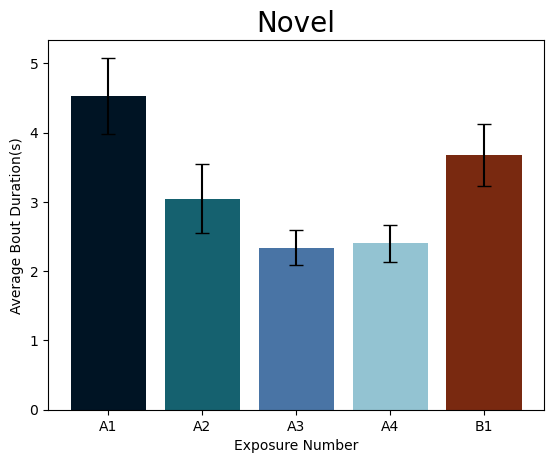

In [622]:
avgBoutsNov = np.stack(list(dictOfAvgBoutNov.values()))
#print(avgBoutsNov)
avgExp1BoutsNovs = avgBoutsNov[:, 0]
avgExp1BoutsNovs = np.array(avgExp1BoutsNovs)/1000
avgExp2BoutsNovs = avgBoutsNov[:, 1]
avgExp2BoutsNovs = np.array(avgExp2BoutsNovs)/1000
avgExp3BoutsNovs = avgBoutsNov[:, 2]
avgExp3BoutsNovs = np.array(avgExp3BoutsNovs)/1000
avgExp4BoutsNovs = avgBoutsNov[:, 3]
avgExp4BoutsNovs = np.array(avgExp4BoutsNovs)/1000
avgExp5BoutsNovs = avgBoutsNov[:, 4]
avgExp5BoutsNovs = np.array(avgExp5BoutsNovs)/1000
avgsNovBouts = (np.mean(avgBoutsNov, axis = 0)) / 1000
print(avgsNovBouts)
#avgsNovFR = avgsNovFR / 1000
semsNovBouts = getmsems(avgExp1BoutsNovs, avgExp2BoutsNovs, avgExp3BoutsNovs, avgExp4BoutsNovs, avgExp5BoutsNovs)

colors = [hex_2_rgb('#001424'), hex_2_rgb('#15616F'), hex_2_rgb('#4974a5'), hex_2_rgb('#93C3D2'), hex_2_rgb('#792910')]


# Create the bar graph
plt.bar(categories, avgsNovBouts, yerr=semsNovBouts, capsize= 5, color=colors)

# Add labels and title
plt.xlabel('Exposure Number')
#plt.ylim(0, 145)
plt.ylabel('Average Bout Duration(s)')
plt.title('Novel', fontsize = 20)

# Show the plot
plt.show()

In [674]:
#phyPath = glob.glob(r"C:\Users\anate\ToAnalyze\*")


batchNov = spike.EphysRecordingCollection(r"C:\Users\anate\ToAnalyze\nov")
batchCage = spike.EphysRecordingCollection(r"C:\Users\anate\ToAnalyze\cage")
print(batchNov.collection)
#batch.collection['24_nov_p1_merged.rec'].subject='2.4'
#batch.collection['24_nov_p1_merged.rec'].event_dict=dictSniffSub
#testerAnalysis= spike.SpikeAnalysis_MultiRecording(tester, 50, 0.5, 750)

<class 'numpy.ndarray'>
11_nov_p1_merged.rec
<class 'numpy.ndarray'>
12_nov_p1_merged.rec
<class 'numpy.ndarray'>
Unit 34 is unsorted & has 1605 spikes
Unit 34 will be deleted
13_nov_p1_merged.rec
<class 'numpy.ndarray'>
21_nov_p1_merged.rec
<class 'numpy.ndarray'>
Unit 162 is unsorted & has 8019 spikes
Unit 162 will be deleted
Unit 184 is unsorted & has 88 spikes
Unit 184 will be deleted
22_nov_p1_merged.rec
<class 'numpy.ndarray'>
24_nov_p1_merged.rec
<class 'numpy.ndarray'>
32_nov_p1_merged.rec
<class 'numpy.ndarray'>
33_nov_p1_merged.rec
<class 'numpy.ndarray'>
41_nov_p1_merged.rec
<class 'numpy.ndarray'>
44_nov_p1_merged.rec
Please assign event dictionaries to each recording
as recording.event_dict
event_dict = {event name(str): np.array[[start(ms), stop(ms)]...]
Please assign subjects to each recording as recording.subject
<class 'numpy.ndarray'>
Unit 64 is unsorted & has 1564 spikes
Unit 64 will be deleted
11_cage_p1_merged.rec
<class 'numpy.ndarray'>
12_cage_p1_merged.rec
<clas

In [675]:

for key in batchNov.collection:
    #print(key)
    batchNov.collection[key].subject= key[0:2]
    batchNov.collection[key].event_dict = dictOfBoris[key[0:6]]
    #print(batchNov.collection[key].event_dict)

for key in batchCage.collection:
    #print(key[0:2])
    batchCage.collection[key].subject= key[0:2]
    batchCage.collection[key].event_dict = dictOfBoris[key[0:7]]
    #print(batchCage.collection[key].event_dict)

novAnalysis=spike.SpikeAnalysis_MultiRecording(batchNov, 50, 0.5, 750)
CageAnalysis=spike.SpikeAnalysis_MultiRecording(batchCage, 50, 0.5, 750)

#for name, recording in batchCage.collection.items():
   #print(name, recording.freq_dict)

#batch.collection['24_nov_p1_merged.rec'].subject='2.4'
#batchNov.collection['11_nov_p1_merged.rec']
#batch.collection['24_nov_p1_merged.rec'].event_dict=dictSniffSub
#testerAnalysis= spike.SpikeAnalysis_MultiRecording(tester, 50, 0.5, 750)

All set to analyze
All set to analyze


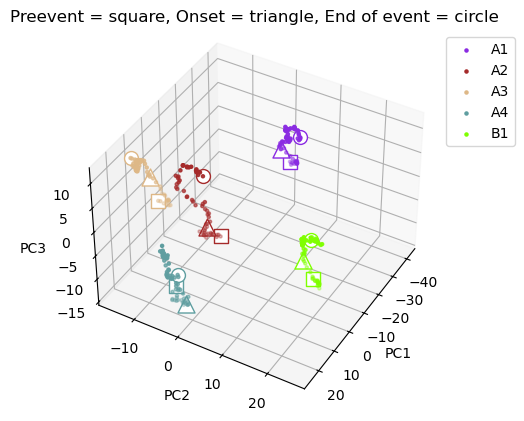

[0.58890846 0.18495267 0.05364369]


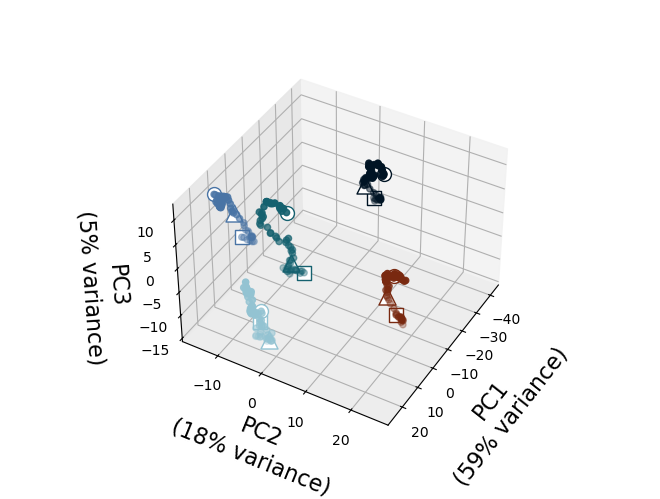

In [678]:
def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color


novPCA = novAnalysis.PCA_trajectories(2, 1, 0, d=3, elev = 40)
#cagePCA = CageAnalysis.PCA_trajectories(2, 1, 0, d=3, elev = 40)
pre_window = 1
post_window = 0
equalize = 2
PCA_matrix = novPCA['transformed data']
timebin = 50
PCA_key = novPCA['labels']
color_id_dict = {'A1': hex_2_rgb('#001424'), 
                 'A2' : hex_2_rgb('#15616F'), 
                 'A3' : hex_2_rgb('#4974a5'),
                'sniffExp4Sub': hex_2_rgb('#93C3D2'),
                  'sniffExp5Sub': hex_2_rgb('#792910'),
                  }
event_lengths = int(
        (equalize + pre_window + post_window) * 1000 / timebin
    )
event_end = int((equalize + pre_window) * 1000 / timebin)
pre_window = pre_window * 1000 / timebin
post_window = post_window * 1000 / timebin
colors = [hex_2_rgb('#001424'), hex_2_rgb('#15616F'), hex_2_rgb('#4974a5'), hex_2_rgb('#93C3D2'), hex_2_rgb('#792910')]
col_counter = 0
#figsize=(8,8)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d",)
for i in range(0, len(PCA_key), event_lengths):
    event_label = PCA_key[i]
    onset = int(i + pre_window - 1)
    end = int(i + event_end - 1)
    post = int(i + event_lengths - 1)
    ax.scatter(
        PCA_matrix[i : i + event_lengths, 0],
        PCA_matrix[i : i + event_lengths, 1],
        PCA_matrix[i : i + event_lengths, 2],
        label=event_label,
        s=20,
        color=colors[col_counter],
    )
    ax.scatter(
        PCA_matrix[i, 0],
        PCA_matrix[i, 1],
        PCA_matrix[i, 2],
        marker="s",
        s=100,
        c="w",
        edgecolors=colors[col_counter],
    )
    ax.scatter(
        PCA_matrix[onset, 0],
        PCA_matrix[onset, 1],
        PCA_matrix[onset, 2],
        marker="^",
        s=150,
        c="w",
        edgecolors=colors[col_counter],
    )
    ax.scatter(
        PCA_matrix[end, 0],
        PCA_matrix[end, 1],
        PCA_matrix[end, 2],
        marker="o",
        s=100,
        c="w",
        edgecolors=colors[col_counter],
    )
    if post_window != 0:
        ax.scatter(
            PCA_matrix[post, 0],
            PCA_matrix[post, 1],
            PCA_matrix[post, 2],
            marker="D",
            s=100,
            c="w",
            edgecolors=colors[col_counter],
        )
    col_counter += 1
#ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
#ax.set_xlim(-20, 45)
#ax.set_ylim(-5, 25)
#ax.set_zlim(-20, 30)
#
ax.view_init(azim = 30, elev =40)
#ax.set_title("Novel", fontsize = 24, y = 1, pad = 30)
xlabel = ax.set_xlabel("\nPC1\n(59% variance)", fontsize = 16, labelpad=10)
ylabel = ax.set_ylabel("\nPC2\n(18% variance)", fontsize = 16)
zlabel = ax.set_zlabel("\nPC3\n(5% variance)", fontsize = 16)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_zticklabels([])
ax.yaxis.pane.set_alpha(0.9)
ax.xaxis.pane.set_alpha(0.9)
ax.zaxis.pane.set_alpha(0.9)


#fig.subplots_adjust(left=0, right=1, top=0.9, bottom=0.15)
fig.subfigures(width_ratios= [1], height_ratios= [1])
print(novPCA['explained variance'][0:3])
plt.savefig('pca_nov.png', dpi = 600, transparent = True, bbox_inches='tight')
plt.show()
#novAnalysis.__get_event_firing_rates__(batchNov.collection['11_nov_p1_merged.rec'],'sniffExp1Sub', 3, 2)

#novAnalysis.fishers_exact_wilcox('sniffExp1Sub', 'sniffExp5Sub', 3, baseline_window=2)
#novAnalysis.PCA_trajectories(3, 1, events=['sniffExp2Sub', 'sniffExp3Sub', 'sniffExp4Sub', 'sniffExp5Sub'], d=2)

9


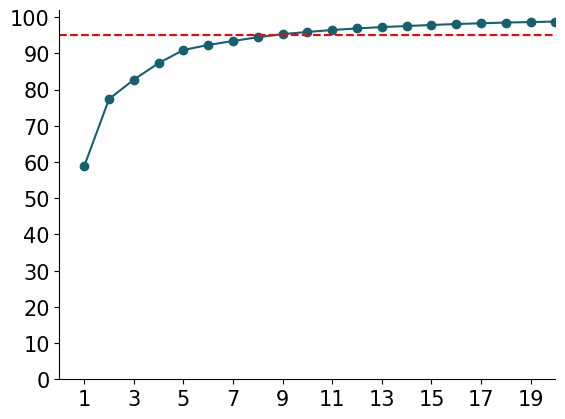

In [812]:
explained_varianceNov = []
explained_varianceNov = (novPCA['explained variance'])*100
#print(explained_varianceNov)
cumulative_varianceNov = np.cumsum(explained_varianceNov)
cumulative_varianceNovArr = []
cumulative_varianceNovArr.append(explained_varianceNov[0])
for i in range(1, len(novPCA['explained variance'])):
    cumulative_varianceNovArr.append(explained_varianceNov[i] + cumulative_varianceNov[i-1])
#print(cumulative_varianceNovArr)
# Find the number of PCs needed to reach the 90% threshold
threshold = 95
num_pcs_needed = np.argmax(cumulative_varianceNov >= threshold) + 1  # Add 1 to get the actual count

# Plotting the bar graph
fig, ax = plt.subplots()

# Plot each PC's explained variance as a bar
ax.plot(range(1, len(cumulative_varianceNovArr) + 1), cumulative_varianceNovArr, marker='o', label='Cumulative Variance', color= hex_2_rgb('#15616F'))

# Highlight the PCs that contribute to the 90% variance threshold
# for i in range(num_pcs_needed):
#     bars[i].set_color('orange')

# Add a horizontal line at the 90% cumulative variance threshold
ax.axhline(y=threshold, color='red', linestyle='--', label='95% variance threshold')
ax.set_xticks(np.arange(1, len(cumulative_varianceNovArr) + 1, 2))  # Tick marks at intervals of 2
y_ticks = np.arange(0, 101, 10)
ax.set_yticks(y_ticks)
ax.set_xticklabels(ax.get_xticks(),fontsize=15)
ax.set_yticklabels(ax.get_yticks(),fontsize=15)
ax.set_xlim(0,20)
# ax.set_ylim(0, 100)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add labels and title
#ax.set_xlabel('Principal Components (PCs)')
#ax.set_ylabel('Variance Explained (%)')
#ax.set_title(f'Number of PCs needed to reach {threshold}% Variance Explained: {num_pcs_needed}')
#ax.legend()

# Display the plot
print(num_pcs_needed)
plt.show()

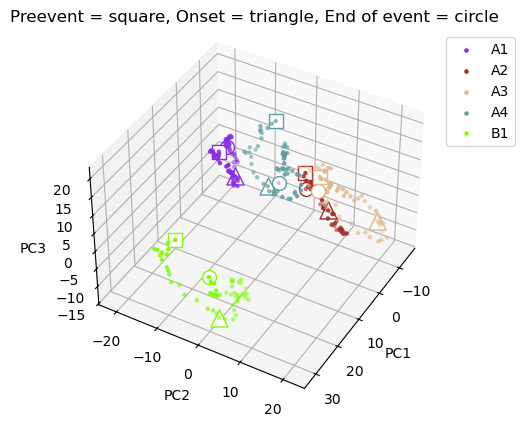

[0.32279465 0.18283766 0.11373821]


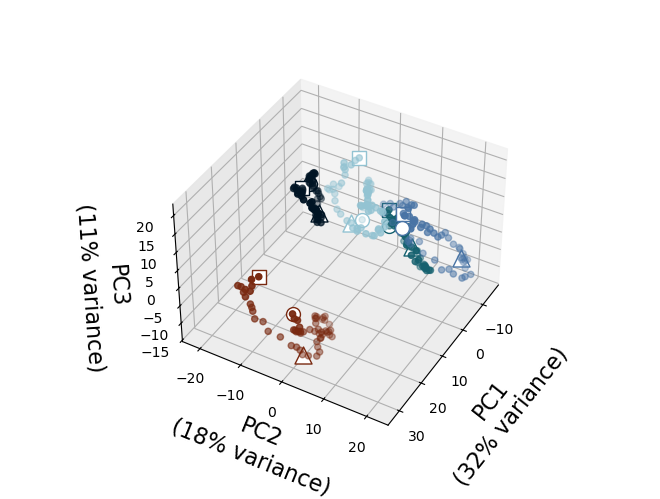

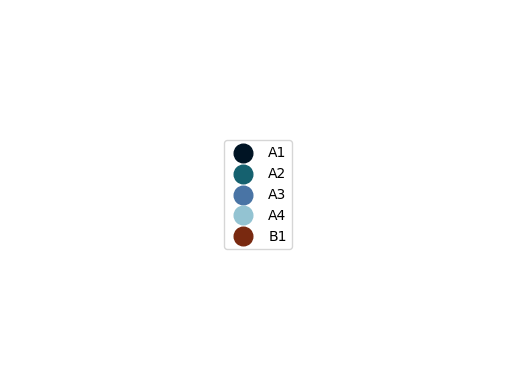

In [688]:
cagePCA = CageAnalysis.PCA_trajectories(2, 1, 0, d=3, elev = 40)
pre_window = 1
post_window = 0
equalize = 2
PCA_matrix = cagePCA['transformed data']
timebin = 50
PCA_key = cagePCA['labels']
color_id_dict = {'A1': hex_2_rgb('#001424'), 
                 'A2' : hex_2_rgb('#15616F'), 
                 'A3' : hex_2_rgb('#4974a5'),
                'sniffExp4Sub': hex_2_rgb('#93C3D2'),
                  'sniffExp5Sub': hex_2_rgb('#792910'),
                  }
event_lengths = int(
        (equalize + pre_window + post_window) * 1000 / timebin
    )
event_end = int((equalize + pre_window) * 1000 / timebin)
pre_window = pre_window * 1000 / timebin
post_window = post_window * 1000 / timebin
colors = [hex_2_rgb('#001424'), hex_2_rgb('#15616F'), hex_2_rgb('#4974a5'), hex_2_rgb('#93C3D2'), hex_2_rgb('#792910')]
col_counter = 0
#figsize=(8,8)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d",)
for i in range(0, len(PCA_key), event_lengths):
    event_label = PCA_key[i]
    onset = int(i + pre_window - 1)
    end = int(i + event_end - 1)
    post = int(i + event_lengths - 1)
    ax.scatter(
        PCA_matrix[i : i + event_lengths, 0],
        PCA_matrix[i : i + event_lengths, 1],
        PCA_matrix[i : i + event_lengths, 2],
        label=event_label,
        s=20,
        color=colors[col_counter],
    )
    ax.scatter(
        PCA_matrix[i, 0],
        PCA_matrix[i, 1],
        PCA_matrix[i, 2],
        marker="s",
        s=100,
        c="w",
        edgecolors=colors[col_counter],
    )
    ax.scatter(
        PCA_matrix[onset, 0],
        PCA_matrix[onset, 1],
        PCA_matrix[onset, 2],
        marker="^",
        s=150,
        c="w",
        edgecolors=colors[col_counter],
    )
    ax.scatter(
        PCA_matrix[end, 0],
        PCA_matrix[end, 1],
        PCA_matrix[end, 2],
        marker="o",
        s=100,
        c="w",
        edgecolors=colors[col_counter],
    )
    if post_window != 0:
        ax.scatter(
            PCA_matrix[post, 0],
            PCA_matrix[post, 1],
            PCA_matrix[post, 2],
            marker="D",
            s=100,
            c="w",
            edgecolors=colors[col_counter],
        )
    col_counter += 1
#ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
#ax.set_xlim(-20, 45)
#ax.set_ylim(-5, 25)
#ax.set_zlim(-20, 30)
#
ax.view_init(azim = 30, elev =40)
#ax.set_title("Cagemate", fontsize = 24, y = 1, pad = 30)
xlabel = ax.set_xlabel("\nPC1\n(32% variance)", fontsize = 16, labelpad=10)
ylabel = ax.set_ylabel("\nPC2\n(18% variance)", fontsize = 16)
zlabel = ax.set_zlabel("\nPC3\n(11% variance)", fontsize = 16)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_zticklabels([])
ax.yaxis.pane.set_alpha(0.9)
ax.xaxis.pane.set_alpha(0.9)
ax.zaxis.pane.set_alpha(0.9)



#fig.subplots_adjust(left=0, right=1, top=0.9, bottom=0.15)
fig.subfigures(width_ratios= [1], height_ratios= [1])
print(cagePCA['explained variance'][0:3])
plt.savefig('pca_cage.png', dpi = 600, transparent = True, bbox_inches='tight')
plt.show()

fig_legend=plt.figure()
fig_legend.legend(*ax.get_legend_handles_labels(), loc='center', markerscale = 3)
fig_legend.gca().set_axis_off()
plt.show()

16


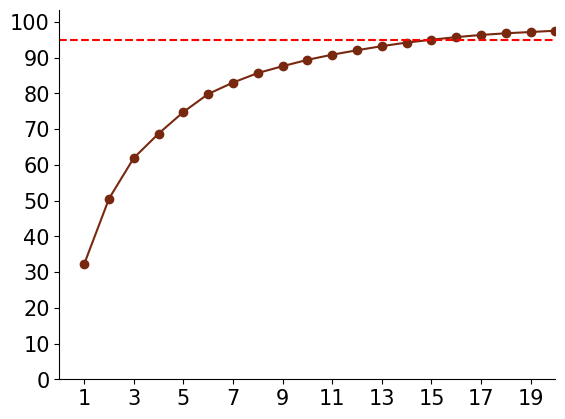

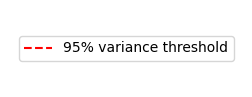

In [813]:
explained_varianceCage = []
explained_varianceCage = (cagePCA['explained variance'])*100
#print(explained_varianceNov)
cumulative_varianceCage = np.cumsum(explained_varianceCage)
cumulative_varianceCageArr = []
cumulative_varianceCageArr.append(explained_varianceCage[0])
for i in range(1, len(cagePCA['explained variance'])):
    cumulative_varianceCageArr.append(explained_varianceCage[i] + cumulative_varianceCage[i-1])
#print(cumulative_varianceNovArr)
# Find the number of PCs needed to reach the 90% threshold
threshold = 95
num_pcs_neededCage = np.argmax(cumulative_varianceCage >= threshold) + 1  # Add 1 to get the actual count

# Plotting the bar graph
fig, ax = plt.subplots()

# Plot each PC's explained variance as a bar
ax.plot(range(1, len(cumulative_varianceCageArr) + 1), cumulative_varianceCageArr, marker='o', label='Cumulative Variance', color= hex_2_rgb('#792810'))

# Highlight the PCs that contribute to the 90% variance threshold
# for i in range(num_pcs_needed):
#     bars[i].set_color('orange')

# Add a horizontal line at the 90% cumulative variance threshold
ax.axhline(y=threshold, color='red', linestyle='--', label='95% variance threshold')
ax.set_xticks(np.arange(1, len(cumulative_varianceCageArr) + 1, 2))  # Tick marks at intervals of 2
y_ticks = np.arange(0, 101, 10)
ax.set_yticks(y_ticks)
ax.set_xticklabels(ax.get_xticks(),fontsize=15)
ax.set_yticklabels(ax.get_yticks(),fontsize=15)
ax.set_xlim(0,20)
#ax.set_ylim(0, 101)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add labels and title
#ax.set_xlabel('Principal Components (PCs)')
#ax.set_ylabel('Variance Explained (%)')
#ax.set_title(f'Number of PCs needed to reach {threshold}% Variance Explained: {num_pcs_needed}')
#ax.legend()

# Display the plot
print(num_pcs_neededCage)

plt.show()

handles, labels = ax.get_legend_handles_labels()

# Find the index of the threshold line in the legend list
threshold_index = labels.index('95% variance threshold')

# Create a new figure for the legend only
fig_legend, ax_legend = plt.subplots(figsize=(3, 1))  # Adjust the size of the legend figure

# Remove axes from the legend figure
ax_legend.axis('off')

# Create the legend for the threshold line only
fig_legend.legend([handles[threshold_index]], [labels[threshold_index]], loc='center')

# Display the legend-only figure
plt.show()

In [754]:
avg_geo_disNov = novAnalysis.avg_geo_dist(3,1, 0.9, post_window=2, events = ['A1', 'A2', 'A3', 'A4', 'B1'])
avg_geo_disNov_df = pd.DataFrame.from_dict(avg_geo_disNov)
#acg_val = avg_geo_dis_df.mean()
#combined_index = avg_geo_dis_df.index.get_level_values("Outer") + avg_geo_dis_df.index.get_level_values("Inner")
#avg_geo_dis_df.index = combined_index
avg_geo_disNov_df.columns.to_list()
#print(avg_geo_disNov_df.columns)
avg_geo_disNov_df.columns = [['A1 vs A2','A1 vs A3', 'A1 vs A4','A1 vs B1', 'A2 vs A3', 'A2 vs A4',
            'A2 vs B1', 'A3 vs A4', 'A3 vs B1', 'A4 vs B1']]
novStatsdf = avg_geo_disNov_df[['A1 vs A2', 'A1 vs A3', 'A1 vs A4', 'A1 vs B1']]
avg_vals_dfNov = avg_geo_disNov_df.mean()
avg_vals_dfNov


A1 vs A2    1212.162486
A1 vs A3    1773.566427
A1 vs A4    1935.549827
A1 vs B1    1638.737627
A2 vs A3     880.876976
A2 vs A4    1123.641464
A2 vs B1    1202.604244
A3 vs A4     787.589533
A3 vs B1    1171.351510
A4 vs B1    1066.443438
dtype: float64

In [758]:
avg_geo_disNovAdj = novAnalysis.avg_geo_dist(3,1, 0.9, post_window=2, events = ['A1', 'A2', 'A4', 'B1'])
avg_geo_disNovAdj_df = pd.DataFrame.from_dict(avg_geo_disNovAdj)
#acg_val = avg_geo_dis_df.mean()
#combined_index = avg_geo_dis_df.index.get_level_values("Outer") + avg_geo_dis_df.index.get_level_values("Inner")
#avg_geo_dis_df.index = combined_index
avg_geo_disNovAdj_df.columns.to_list()
#print(avg_geo_disNov_df.columns)
avg_geo_disNovAdj_df.columns = [['A1 vs A2', 'A1 vs A4','A1 vs B1', 'A2 vs A4', 'A2 vs B1', 'A4 vs B1']]
novStatsTry2df = avg_geo_disNovAdj_df[['A1 vs A2', 'A1 vs A4', 'A1 vs B1']]
avg_vals_dfNovAdj = avg_geo_disNovAdj_df.mean()
avg_vals_dfNovAdj

A1 vs A2    1224.433777
A1 vs A4    1940.466092
A1 vs B1    1640.229278
A2 vs A4    1126.104414
A2 vs B1    1215.783040
A4 vs B1    1072.390539
dtype: float64

In [730]:
#FOR CAGES, using the adj model but for cage data
avg_geo_disCage = CageAnalysis.avg_geo_dist(3,1, 0.9, post_window=2, events = ['A1', 'A2', 'A4', 'B1'])
avg_geo_disCage_df = pd.DataFrame.from_dict(avg_geo_disCage)
#acg_val = avg_geo_dis_df.mean()
#combined_index = avg_geo_dis_df.index.get_level_values("Outer") + avg_geo_dis_df.index.get_level_values("Inner")
#avg_geo_dis_df.index = combined_index
avg_geo_disCage_df.columns.to_list()
#print(avg_geo_disNov_df.columns)
avg_geo_disCage_df.columns = [['A1 vs A2', 'A1 vs A4','A1 vs B1', 'A2 vs A4', 'A2 vs B1', 'A4 vs B1']]
avg_vals_dfCage = avg_geo_disCage_df.mean()
avg_vals_dfCage

A1 vs A2     949.646501
A1 vs A4    1057.344200
A1 vs B1    1278.843450
A2 vs A4    1025.131910
A2 vs B1    1289.855623
A4 vs B1    1098.444166
dtype: float64

In [738]:
#FOR CAGES adjpt2
avg_geo_disCageAdj = CageAnalysis.avg_geo_dist(3,1, 0.9, post_window=2, events = ['A1', 'A2', 'A3', 'A4', 'B1'])
avg_geo_disCageAdj_df = pd.DataFrame.from_dict(avg_geo_disCageAdj)
#acg_val = avg_geo_dis_df.mean()
#combined_index = avg_geo_dis_df.index.get_level_values("Outer") + avg_geo_dis_df.index.get_level_values("Inner")
#avg_geo_dis_df.index = combined_index
avg_geo_disCageAdj_df.columns.to_list()
#print(avg_geo_disNov_df.columns)
avg_geo_disCageAdj_df.columns = [['A1 vs A2','A1 vs A3', 'A1 vs A4','A1 vs B1', 'A2 vs A3', 'A2 vs A4',
            'A2 vs B1', 'A3 vs A4', 'A3 vs B1', 'A4 vs B1']]
avg_vals_dfCageAdj = avg_geo_disCageAdj_df.mean()
avg_vals_dfCageAdj

A1 vs A2     950.329189
A1 vs A3    1085.347569
A1 vs A4    1052.887325
A1 vs B1    1279.081034
A2 vs A3     912.554376
A2 vs A4    1022.849655
A2 vs B1    1289.841162
A3 vs A4     996.871284
A3 vs B1    1233.296857
A4 vs B1    1099.305655
dtype: float64

In [749]:
#FOR CAGES stats
avg_geo_disCageAdjTry = CageAnalysis.avg_geo_dist(3,1, 0.9, post_window=2, events = ['A1', 'A2', 'A3', 'A4', 'B1'])
avg_geo_disCageAdjTry_df = pd.DataFrame.from_dict(avg_geo_disCageAdjTry)
#acg_val = avg_geo_dis_df.mean()
#combined_index = avg_geo_dis_df.index.get_level_values("Outer") + avg_geo_dis_df.index.get_level_values("Inner")
#avg_geo_dis_df.index = combined_index
avg_geo_disCageAdjTry_df.columns.to_list()
#print(avg_geo_disNov_df.columns)
avg_geo_disCageAdj_df.columns = [['A1 vs A2','A1 vs A3', 'A1 vs A4','A1 vs B1', 'A2 vs A3', 'A2 vs A4',
            'A2 vs B1', 'A3 vs A4', 'A3 vs B1', 'A4 vs B1']]
cageStatsdf = avg_geo_disCageAdj_df[['A1 vs A2', 'A1 vs A3', 'A1 vs A4', 'A1 vs B1']]
avg_vals_Cagestats = cageStatsdf.mean()
avg_vals_Cagestats

A1 vs A2     950.329189
A1 vs A3    1085.347569
A1 vs A4    1052.887325
A1 vs B1    1279.081034
dtype: float64

In [718]:
avg_valsNov = avg_vals_dfNov.values.tolist()
print(avg_valsNov)
avg_semsNovGeo = avg_geo_disNov_df.sem()
avg_semsNovGeo = avg_semsNovGeo.values.tolist()


[1212.1624861547273, 1773.566427324598, 1935.5498274758259, 1638.7376266243912, 880.8769762403851, 1123.6414641478607, 1202.6042440261313, 787.58953318066, 1171.3515102053907, 1066.4434380663565]


In [719]:
avg_valsNovAdj = avg_vals_dfNovAdj.values.tolist()
print(avg_valsNovAdj)
avg_semsNovGeoAdj = avg_geo_disNovAdj_df.sem()
avg_semsNovGeoAdj = avg_semsNovGeoAdj.values.tolist()

[1224.433776716919, 1940.4660917389651, 1640.229278214369, 1126.1044143959205, 1215.7830400288535, 1072.3905394223602]


In [731]:
#FOR CAGE Cage
avg_valsCage = avg_vals_dfCage.values.tolist()
print(avg_valsCage)
avg_semsCageGeo = avg_geo_disCage_df.sem()
avg_semsCageGeo = avg_semsCageGeo.values.tolist()

[949.6465007746381, 1057.3441996623844, 1278.8434499563402, 1025.1319097785997, 1289.855623264507, 1098.4441658738242]


In [739]:
avg_valsCageAdj = avg_vals_dfCageAdj.values.tolist()
print(avg_valsCageAdj)
avg_semsCageGeoAdj = avg_geo_disCageAdj_df.sem()
avg_semsCageGeoAdj = avg_semsCageGeoAdj.values.tolist()

[950.3291886600574, 1085.3475687069435, 1052.8873253940621, 1279.0810341039667, 912.5543755924435, 1022.849655039441, 1289.8411619019157, 996.8712844149203, 1233.296857219728, 1099.3056551112038]


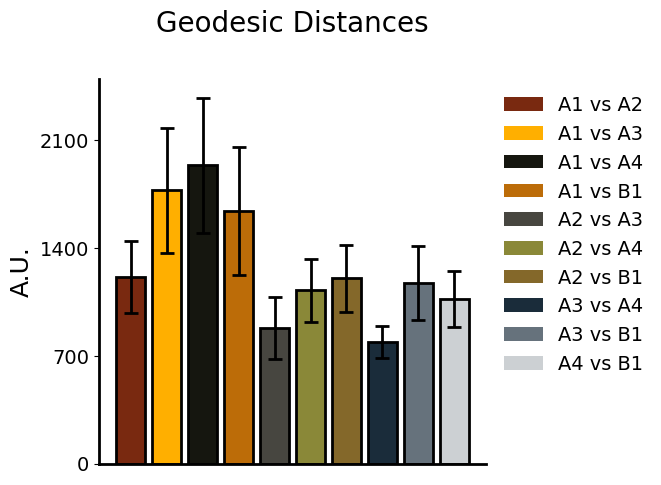

In [702]:
color_id_dict = {'A1 vs A2': hex_2_rgb('#792910'),'A1 vs A3': hex_2_rgb('#FFAF00'), 'A1 vs A4': hex_2_rgb('#1516F'),
                 'A1 vs B1': hex_2_rgb('#bc6c08'), 'A2 vs A3': hex_2_rgb('#474640'), 'A2 vs A4': hex_2_rgb('#8a8838'),
                'A2 vs B1': hex_2_rgb('#84682a'), 'A3 vs A4':hex_2_rgb('#1a2c3a') , 'A3 vs B1': hex_2_rgb('#66727c'), 
                'A4 vs B1': hex_2_rgb('#ccd0d3')}
hatches = ['','','','','','','','','','']  
plt.figure(figsize= (5,5))           
plt.bar(color_id_dict.keys(), avg_valsNov, yerr = avg_semsNovGeo,
            color = color_id_dict.values(), hatch = hatches,
            edgecolor = ['black', 'black', 'black'],
            capsize = 5, linewidth = 2, error_kw={'elinewidth': 2, 'capthick': 2})
plt.xticks([],rotation=45)
legend_handles = [Patch(facecolor=color, label=label) for label, color in color_id_dict.items()]
plt.legend(handles=legend_handles,
           bbox_to_anchor=(1,1),
           frameon= False, fontsize = 14)
plt.ylabel('A.U.', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(700))
plt.ylim(0,2500)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
hatches = ['//','','','', '']
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Geodesic Distances Nov', fontsize = 20, y =1.1)
plt.savefig('phase2_geodist.png', dpi = 600, transparent = True, bbox_inches='tight')
plt.show()

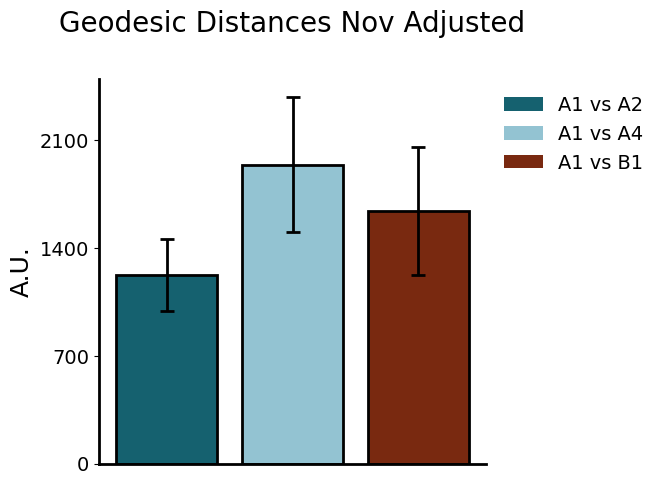

In [729]:
color_id_dict = {'A1 vs A2': hex_2_rgb('#15616F'),'A1 vs A4': hex_2_rgb('#93C3D2'),
                 'A1 vs B1': hex_2_rgb('#792910'), 'A2 vs A4': hex_2_rgb('#8a8838'),
                'A2 vs B1': hex_2_rgb('#84682a'),'A4 vs B1': hex_2_rgb('#ccd0d3')}
hatches = ['','','']  
listColorNames = list(color_id_dict.keys())
listColorVals = list(color_id_dict.values())
selected_labels = [listColorNames[i] for i in [0, 1, 2]]
selected_colors = [listColorVals[i] for i in [0, 1, 2]]
selected_values = [avg_valsNovAdj[i] for i in [0, 1, 2]]
selected_sems = [avg_semsNovGeoAdj[i] for i in [0, 1, 2]]
plt.figure(figsize= (5,5))           
plt.bar(selected_labels, selected_values, yerr = selected_sems,
            color = selected_colors, hatch = hatches,
            edgecolor = ['black', 'black', 'black'],
            capsize = 5, linewidth = 2, error_kw={'elinewidth': 2, 'capthick': 2})
plt.xticks([],rotation=45)
legend_handles = [Patch(facecolor=color, label=label) for label, color in color_id_dict.items()]
selected_legend_handles = [legend_handles[i] for i in [0, 1, 2]]
plt.legend(handles=selected_legend_handles,
           bbox_to_anchor=(1,1),
           frameon= False, fontsize = 14)
plt.ylabel('A.U.', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(700))
plt.ylim(0,2500)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
hatches = ['//','','','', '']
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Geodesic Distances Nov Adjusted', fontsize = 20, y =1.1)
plt.savefig('phase2_geodist.png', dpi = 600, transparent = True, bbox_inches='tight')
plt.show()

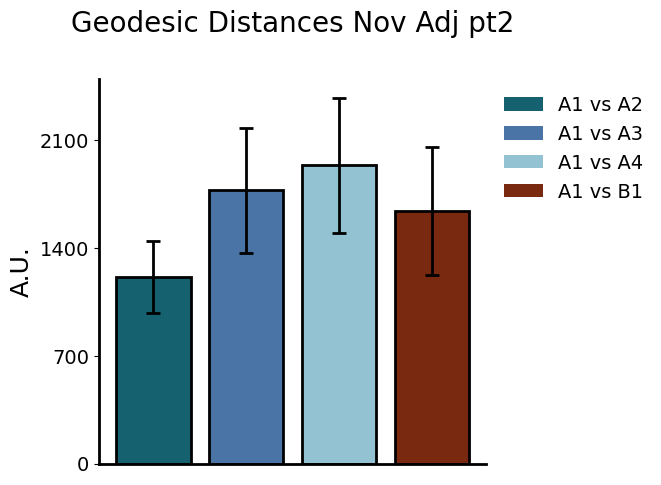

In [743]:
color_id_dict = {'A1 vs A2': hex_2_rgb('#15616F'),'A1 vs A3': hex_2_rgb('#4974a5'), 'A1 vs A4': hex_2_rgb('#93C3D2'),
                 'A1 vs B1': hex_2_rgb('#792910'), 'A2 vs A3': hex_2_rgb('#474640'), 'A2 vs A4': hex_2_rgb('#8a8838'),
                'A2 vs B1': hex_2_rgb('#84682a'), 'A3 vs A4':hex_2_rgb('#1a2c3a') , 'A3 vs B1': hex_2_rgb('#66727c'), 
                'A4 vs B1': hex_2_rgb('#ccd0d3')}
hatches = ['','','','']  
listColorNames = list(color_id_dict.keys())
listColorVals = list(color_id_dict.values())
selected_labels = [listColorNames[i] for i in [0, 1, 2, 3]]
selected_colors = [listColorVals[i] for i in [0, 1, 2, 3]]
selected_values = [avg_valsNov[i] for i in [0, 1, 2, 3]]
selected_sems = [avg_semsNovGeo[i] for i in [0, 1, 2, 3]] 
plt.figure(figsize= (5,5))           
plt.bar(selected_labels, selected_values, yerr = selected_sems,
            color = selected_colors, hatch = hatches,
            edgecolor = ['black', 'black', 'black'],
            capsize = 5, linewidth = 2, error_kw={'elinewidth': 2, 'capthick': 2})
plt.xticks([],rotation=45)
legend_handles = [Patch(facecolor=color, label=label) for label, color in color_id_dict.items()]
selected_legend_handles = [legend_handles[i] for i in [0, 1, 2, 3]]
plt.legend(handles=selected_legend_handles,
           bbox_to_anchor=(1,1),
           frameon= False, fontsize = 14)
plt.ylabel('A.U.', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(700))
plt.ylim(0,2500)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
hatches = ['//','','','', '']
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Geodesic Distances Nov Adj pt2', fontsize = 20, y =1.1)
plt.savefig('nov_geodist.png', dpi = 600, transparent = True, bbox_inches='tight')
plt.show()
#Repeated Exposures to a novel agent increases distance in PCA space

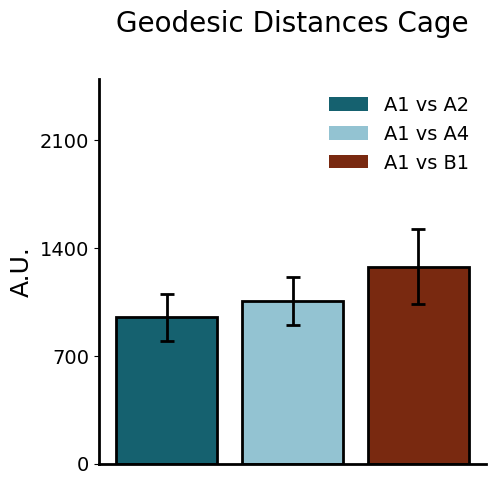

In [732]:
color_id_dict = {'A1 vs A2': hex_2_rgb('#15616F'),'A1 vs A4': hex_2_rgb('#93C3D2'),
                 'A1 vs B1': hex_2_rgb('#792910'), 'A2 vs A4': hex_2_rgb('#8a8838'),
                'A2 vs B1': hex_2_rgb('#84682a'),'A4 vs B1': hex_2_rgb('#ccd0d3')}
hatches = ['','','']  
listColorNames = list(color_id_dict.keys())
listColorVals = list(color_id_dict.values())
selected_labels = [listColorNames[i] for i in [0, 1, 2]]
selected_colors = [listColorVals[i] for i in [0, 1, 2]]
selected_values = [avg_valsCage[i] for i in [0, 1, 2]]
selected_sems = [avg_semsCageGeo[i] for i in [0, 1, 2]]
plt.figure(figsize= (5,5))           
plt.bar(selected_labels, selected_values, yerr = selected_sems,
            color = selected_colors, hatch = hatches,
            edgecolor = ['black', 'black', 'black'],
            capsize = 5, linewidth = 2, error_kw={'elinewidth': 2, 'capthick': 2})
plt.xticks([],rotation=45)
legend_handles = [Patch(facecolor=color, label=label) for label, color in color_id_dict.items()]
selected_legend_handles = [legend_handles[i] for i in [0, 1, 2]]
plt.legend(handles=selected_legend_handles,
           bbox_to_anchor=(1,1),
           frameon= False, fontsize = 14)
plt.ylabel('A.U.', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(700))
plt.ylim(0,2500)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
hatches = ['//','','','', '']
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Geodesic Distances Cage', fontsize = 20, y =1.1)
plt.savefig('phase2_geodist.png', dpi = 600, transparent = True, bbox_inches='tight')
plt.show()

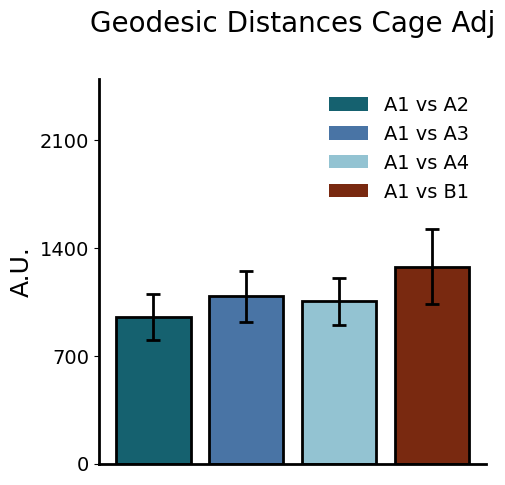

In [742]:
color_id_dict = {'A1 vs A2': hex_2_rgb('#15616F'),'A1 vs A3': hex_2_rgb('#4974a5'), 'A1 vs A4': hex_2_rgb('#93C3D2'),
                 'A1 vs B1': hex_2_rgb('#792910'), 'A2 vs A3': hex_2_rgb('#474640'), 'A2 vs A4': hex_2_rgb('#8a8838'),
                'A2 vs B1': hex_2_rgb('#84682a'), 'A3 vs A4':hex_2_rgb('#1a2c3a') , 'A3 vs B1': hex_2_rgb('#66727c'), 
                'A4 vs B1': hex_2_rgb('#ccd0d3')}
hatches = ['','','','']  
listColorNames = list(color_id_dict.keys())
listColorVals = list(color_id_dict.values())
selected_labels = [listColorNames[i] for i in [0, 1, 2, 3]]
selected_colors = [listColorVals[i] for i in [0, 1, 2, 3]]
selected_values = [avg_valsCageAdj[i] for i in [0, 1, 2, 3]]
selected_sems = [avg_semsCageGeoAdj[i] for i in [0, 1, 2, 3]] 
plt.figure(figsize= (5,5))           
plt.bar(selected_labels, selected_values, yerr = selected_sems,
            color = selected_colors, hatch = hatches,
            edgecolor = ['black', 'black', 'black'],
            capsize = 5, linewidth = 2, error_kw={'elinewidth': 2, 'capthick': 2})
plt.xticks([],rotation=45)
legend_handles = [Patch(facecolor=color, label=label) for label, color in color_id_dict.items()]
selected_legend_handles = [legend_handles[i] for i in [0, 1, 2, 3]]
plt.legend(handles=selected_legend_handles,
           bbox_to_anchor=(1,1),
           frameon= False, fontsize = 14)
plt.ylabel('A.U.', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(700))
plt.ylim(0,2500)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
hatches = ['//','','','', '']
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Geodesic Distances Cage Adj', fontsize = 20, y =1.1)
plt.savefig('cage_geodist.png', dpi = 600, transparent = True, bbox_inches='tight')
plt.show()

In [704]:
p_valuesNovGeo = []
for pair in combinations(avg_geo_disNov_df.columns, 2):
    t_statNovGeo, p_valueNovGeo = ttest_rel(avg_geo_disNov_df[pair[0]], avg_geo_disNov_df[pair[1]])
    p_valuesNovGeo.append(p_valueNovGeo)


adjusted_p_valuesNovGeo = multipletests(p_valuesNovGeo, method='holm')
adjusted_p_valuesNovGeo

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.44606266, 0.93999552, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.31591438, 0.3960362 ,
        1.        , 0.76955849, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]),
 0.0011392016030112861,
 0.00

In [722]:
p_valuesNovGeoAdj = []
for pair in combinations(avg_geo_disNovAdj_df.columns, 2):
    t_statNovGeoAdj, p_valueNovGeoAdj = ttest_rel(avg_geo_disNovAdj_df[pair[0]], avg_geo_disNovAdj_df[pair[1]])
    p_valuesNovGeoAdj.append(p_valueNovGeoAdj)


adjusted_p_valuesNovGeoAdj = multipletests(p_valuesNovGeoAdj, method='holm')
adjusted_p_valuesNovGeoAdj

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False]),
 array([0.38428962, 1.        , 1.        , 1.        , 1.        ,
        0.54717728, 0.1411488 , 0.38428962, 0.54717728, 0.59859942,
        0.92302079, 1.        , 1.        , 1.        , 1.        ]),
 0.0034137129465903193,
 0.0033333333333333335)

In [757]:
p_valuesNovStats = []
print(novStatsdf.columns)
for pair in combinations(novStatsdf.columns, 2):
    t_statNovStats, p_valueNovStats = ttest_rel(novStatsdf[pair[0]], novStatsdf[pair[1]])
    p_valuesNovStats.append(p_valueNovStats)


adjusted_p_valuesNovStats = multipletests(p_valuesNovStats, method='holm')
adjusted_p_valuesNovStats

MultiIndex([('A1 vs A2',),
            ('A1 vs A3',),
            ('A1 vs A4',),
            ('A1 vs B1',)],
           )


(array([False, False, False, False, False, False]),
 array([0.18027629, 0.1673577 , 0.37698301, 0.54623121, 0.54623121,
        0.18328511]),
 0.008512444610847103,
 0.008333333333333333)

In [759]:
p_valuesNovStatsTry2 = []
print(novStatsTry2df.columns)
for pair in combinations(novStatsTry2df.columns, 2):
    t_statNovStatsTry2, p_valueNovStatsTry2 = ttest_rel(novStatsTry2df[pair[0]], novStatsTry2df[pair[1]])
    p_valuesNovStatsTry2.append(p_valueNovStatsTry2)


adjusted_p_valuesNovStatsTry2 = multipletests(p_valuesNovStatsTry2, method='holm')
adjusted_p_valuesNovStatsTry2

MultiIndex([('A1 vs A2',),
            ('A1 vs A4',),
            ('A1 vs B1',)],
           )


(array([False, False, False]),
 array([0.08534089, 0.12871387, 0.09119621]),
 0.016952427508441503,
 0.016666666666666666)

In [744]:
avg_vals_dfCage

A1 vs A2     949.646501
A1 vs A4    1057.344200
A1 vs B1    1278.843450
A2 vs A4    1025.131910
A2 vs B1    1289.855623
A4 vs B1    1098.444166
dtype: float64

In [733]:
p_valuesCageGeo = []
for pair in combinations(avg_geo_disCage_df.columns, 2):
    t_statCageGeo, p_valueCageGeo = ttest_rel(avg_geo_disCage_df[pair[0]], avg_geo_disCage_df[pair[1]])
    p_valuesCageGeo.append(p_valueCageGeo)


adjusted_p_valuesCageGeo = multipletests(p_valuesCageGeo, method='holm')
adjusted_p_valuesCageGeo

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False]),
 array([1.        , 0.49232404, 1.        , 0.44140359, 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.80803228, 0.88619888, 1.        , 0.86395612]),
 0.0034137129465903193,
 0.0033333333333333335)

In [752]:
p_valuesCageGeoStats = []
print(cageStatsdf.columns)
for pair in combinations(cageStatsdf.columns, 2):
    t_statCageGeoStats, p_valueCageGeoStats = ttest_rel(cageStatsdf[pair[0]], cageStatsdf[pair[1]])
    p_valuesCageGeoStats.append(p_valueCageGeoStats)


adjusted_p_valuesCageGeoStats = multipletests(p_valuesCageGeoStats, method='holm')
adjusted_p_valuesCageGeoStats

MultiIndex([('A1 vs A2',),
            ('A1 vs A3',),
            ('A1 vs A4',),
            ('A1 vs B1',)],
           )


(array([False, False, False, False, False, False]),
 array([0.34707054, 0.52488054, 0.21160608, 0.62426832, 0.52488054,
        0.52488054]),
 0.008512444610847103,
 0.008333333333333333)

In [709]:
def trajectory_length(pca_matrix, key):
    trajectory_lengths = []
    event_order = []
    unique_values, counts = np.unique(key, return_counts=True)
    event_len = counts[0]
    for j in range(0, len(key), event_len):
        trajectory_length = 0
        for i in range(event_len-1):
            trajectory_length = trajectory_length + euclidean(
                pca_matrix[j+i, :],
                pca_matrix[j+i+1, :])
        trajectory_lengths.append(trajectory_length)
        event_order.append(key[j])
    return [trajectory_lengths, event_order]

trajectory_lengthsNov = []
ordersNov= []
for recording in batchNov.collection.keys():
    pc_dict = novAnalysis.PCA_matrix_generation(3, 1,
                                                 post_window = 2,
                                                 events = ['A1','A2','A3', 'A4', 'B1'],
                                                recordings = [recording])
    [traj_lenNov, event_orderNov] = trajectory_length(pc_dict['transformed data'],
                                            pc_dict['labels'])
    trajectory_lengthsNov.append(traj_lenNov)
    ordersNov.append(event_orderNov)
trajectory_lengthsNov = np.array(trajectory_lengthsNov)

print(trajectory_lengthsNov.shape)

meansNov = np.mean(trajectory_lengthsNov, axis = 0)
semsNov = sem(trajectory_lengthsNov, axis = 0)

print(ordersNov[0])
print(meansNov)
means = meansNov[[4, 3, 2,1,0]]
sems = semsNov[[4, 3, 2,1,0]]

(10, 5)
['A1', 'A2', 'A3', 'A4', 'B1']
[ 78.8721165   95.19919192  94.50771219 124.81458147  85.45776752]


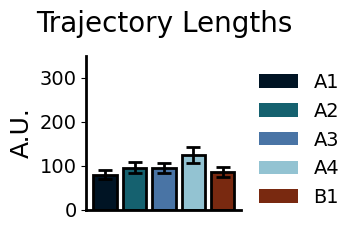

In [713]:
color_id_dict = {'A1': hex_2_rgb('#001424'), 
                 'A2' : hex_2_rgb('#15616F'), 
                 'A3' : hex_2_rgb('#4974a5'),
                'A4': hex_2_rgb('#93C3D2'),
                  'B1': hex_2_rgb('#792910'),
                  }
hatches = ['','','','','']  
x = [0.5,1,1.5,2,2.5]
plt.figure(figsize= (2,2))           
plt.bar(x, meansNov, yerr = semsNov,
            color = color_id_dict.values(), hatch = hatches,
            edgecolor = ['black', 'black', 'black'],
            capsize = 5, linewidth = 2,
            error_kw={'elinewidth': 2, 'capthick': 2}, 
            width = .4)
plt.xticks([],rotation=45)
legend_handles = [Patch(facecolor=color, label=label) for label, color in color_id_dict.items()]
plt.legend(handles=legend_handles,
           bbox_to_anchor=(1,1),
           frameon= False, fontsize = 14)
plt.ylabel('A.U.', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100))
plt.ylim(0,350)
hatches = ['//','','','', '']
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Trajectory Lengths', fontsize = 20, y = 1.1)
plt.savefig('phase2_trajlen.png', dpi = 600, transparent = True, bbox_inches='tight')
plt.show()


In [650]:

for event in ['A1', 'A2', 'A3', 'A4', 'B1']:
    results = novAnalysis.wilcox_baseline_v_event_collection(event, equalize, baseline_window=1, offset=0, save = True, plot = False)

Wilcoxon can't be done on 12_nov_p1_merged.rec A4, because <6 samples
Wilcoxon can't be done on 22_nov_p1_merged.rec A4, because <6 samples


In [651]:
batchNov.wilcox_dfs
#print(batchNov.wilcox_dfs.keys())
df_list = []
exp = ['A1', 'A2', 'A3', 'A4', 'B1']
for comparison in ['2s Exp1 vs 1s baseline', '2s Exp2 vs 1s baseline', '2s Exp3 vs 1s baseline', '2s Exp4 vs 1s baseline', '2s Exp5 vs 1s baseline']:
    df = batchNov.wilcox_dfs[comparison]

    df_list.append(df)

is_first = True 
for df in df_list:
    i = 1
    if is_first:
        presniff_master_df = df[['Subject', 'Recording', 'original unit id', 
                            'Event','event1 vs event2']]
        is_first = False
    else: 
        temp_df = df[['Subject', 'Recording', 'original unit id', 
                            'Event', 'event1 vs event2']]
        temp_df.columns = [f'Subject', 'Recording', 'original unit id', 
                            'Event {i}', 'event{i} vs event2']
        presniff_master_df = presniff_master_df.merge(temp_df,  on=['Subject', 'Recording', 'original unit id'], how = 'left', suffixes = ['', exp[i]])
        
        i +=1
presniff_master_df 

,Subject,Recording,original unit id,Event,event1 vs event2,Event {i},event{i} vs event2,Event {i}A2,event{i} vs event2A2,Event {i}A2,event{i} vs event2A2,Event {i}A2,event{i} vs event2A2
0,11,11_nov_p1_merged.rec,201,2s Exp1 vs 1s baseline,not significant,2s Exp2 vs 1s baseline,not significant,2s Exp3 vs 1s baseline,not significant,2s Exp4 vs 1s baseline,not significant,2s Exp5 vs 1s baseline,not significant
1,11,11_nov_p1_merged.rec,125,2s Exp1 vs 1s baseline,not significant,2s Exp2 vs 1s baseline,not significant,2s Exp3 vs 1s baseline,not significant,2s Exp4 vs 1s baseline,not significant,2s Exp5 vs 1s baseline,increases
2,11,11_nov_p1_merged.rec,210,2s Exp1 vs 1s baseline,increases,2s Exp2 vs 1s baseline,not significant,2s Exp3 vs 1s baseline,not significant,2s Exp4 vs 1s baseline,not significant,2s Exp5 vs 1s baseline,not significant
3,11,11_nov_p1_merged.rec,268,2s Exp1 vs 1s baseline,increases,2s Exp2 vs 1s baseline,increases,2s Exp3 vs 1s baseline,not significant,2s Exp4 vs 1s baseline,not significant,2s Exp5 vs 1s baseline,increases
4,11,11_nov_p1_merged.rec,9,2s Exp1 vs 1s baseline,not significant,2s Exp2 vs 1s baseline,not significant,2s Exp3 vs 1s baseline,increases,2s Exp4 vs 1s baseline,not significant,2s Exp5 vs 1s baseline,not significant
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,44,44_nov_p1_merged.rec,123,2s Exp1 vs 1s baseline,not significant,2s Exp2 vs 1s baseline,not significant,2s Exp3 vs 1s baseline,increases,2s Exp4 vs 1s baseline,not significant,2s Exp5 vs 1s baseline,not significant
124,44,44_nov_p1_merged.rec,98,2s Exp1 vs 1s baseline,not significant,2s Exp2 vs 1s baseline,not significant,2s Exp3 vs 1s baseline,not significant,2s Exp4 vs 1s baseline,not significant,2s Exp5 vs 1s baseline,not significant
125,44,44_nov_p1_merged.rec,190,2s Exp1 vs 1s baseline,not significant,2s Exp2 vs 1s baseline,not significant,2s Exp3 vs 1s baseline,not significant,2s Exp4 vs 1s baseline,not significant,2s Exp5 vs 1s baseline,not significant
126,44,44_nov_p1_merged.rec,133,2s Exp1 vs 1s baseline,not significant,2s Exp2 vs 1s baseline,not significant,2s Exp3 vs 1s baseline,not significant,2s Exp4 vs 1s baseline,increases,2s Exp5 vs 1s baseline,not significant


In [652]:
presniff_master_df.columns = ['Subject',
 'Recording',
 'original unit id',
 'Event_x',
 'A1 vs baseline',
 'Event_y',
 'A2 vs baseline',
 'Event_x1',
 'A3 vs baseline',
 'Event_y1',
 'A4 vs baseline',
 'Event_x2',
 'B1 vs baseline']
presniff_master_df = presniff_master_df[['original unit id',
 'A1 vs baseline',
 'A2 vs baseline',
 'A3 vs baseline',
 'A4 vs baseline',
 'B1 vs baseline']]
presniff_master_df

,original unit id,A1 vs baseline,A2 vs baseline,A3 vs baseline,A4 vs baseline,B1 vs baseline
0,201,not significant,not significant,not significant,not significant,not significant
1,125,not significant,not significant,not significant,not significant,increases
2,210,increases,not significant,not significant,not significant,not significant
3,268,increases,increases,not significant,not significant,increases
4,9,not significant,not significant,increases,not significant,not significant
...,...,...,...,...,...,...
123,123,not significant,not significant,increases,not significant,not significant
124,98,not significant,not significant,not significant,not significant,not significant
125,190,not significant,not significant,not significant,not significant,not significant
126,133,not significant,not significant,not significant,increases,not significant


In [653]:
def group_cells(Exp1, Exp2, Exp3, Exp4, Exp5, acquisition=None):
    group = ''
    if (Exp1 == 'increases') or (Exp1 == 'decreases'):
        group = 'A1'
    if (Exp2 == 'increases') or (Exp2 == 'decreases'):
        group = group + 'A2' 
    if (Exp3 == 'increases') or (Exp3== 'decreases'):
        group = group + 'A3'
    if (Exp4 == 'increases') or (Exp4 == 'decreases'):
        group = group + 'A4' 
    if (Exp5 == 'increases') or (Exp5== 'decreases'):
        group = group + 'B1'
    if acquisition is not None:
        if (acquisition == 'increases') or (acquisition == 'decreases'):
            group = group + 'acquisition'
    return group

presniff_master_df['cell group'] = presniff_master_df.apply(lambda row: group_cells(row['A1 vs baseline'],
                                                                  row['A2 vs baseline'],
                                                                  row['A3 vs baseline'],
                                                                  row['A4 vs baseline'],
                                                                  row['B1 vs baseline']), axis = 1)
results = presniff_master_df.groupby('cell group').count()
results

C:\Users\anate\AppData\Local\Temp\ipykernel_22756\2761038930.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  presniff_master_df['cell group'] = presniff_master_df.apply(lambda row: group_cells(row['A1 vs baseline'],


,original unit id,A1 vs baseline,A2 vs baseline,A3 vs baseline,A4 vs baseline,B1 vs baseline
cell group,,,,,,
,82,82,82,82,61,82
A1,11,11,11,11,10,11
A1A2B1,4,4,4,4,4,4
A1A4B1,1,1,1,1,1,1
A2,6,6,6,6,5,6
A2A3B1,1,1,1,1,1,1
A2A4,1,1,1,1,1,1
A2B1,1,1,1,1,1,1
A3,6,6,6,6,6,6


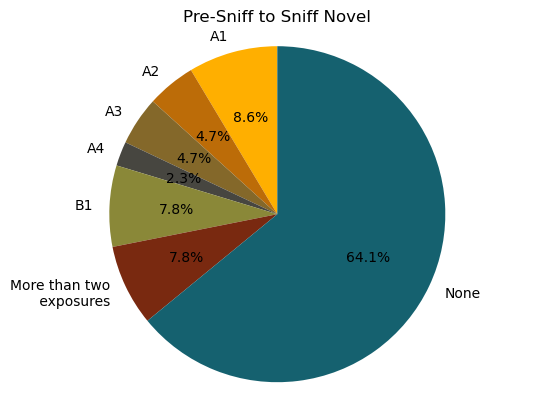

In [654]:
def plot_pie_chart(labels, sizes, title):
    """
    Plot a pie chart.

    Parameters:
    labels (list of str): Labels for each slice of the pie.
    sizes (list of float): Sizes of each slice (should sum to 100%).
    title (str): Title for the pie chart.
    """
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
           colors=[hex_2_rgb('#FFAF00'), hex_2_rgb('#bc6c08'), hex_2_rgb('#84682a'), 
                   hex_2_rgb('#474640'), hex_2_rgb('#8a8838'), hex_2_rgb('#792910'), hex_2_rgb('#15616F')])
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(title)
    plt.show()

# Example usage:
plot_pie_chart(['A1', 'A2', 'A3','A4', 'B1', 'More than two\n exposures', 'None'], 
               [11, 6, 6, 3, 10, 10, 82], 'Pre-Sniff to Sniff Novel')

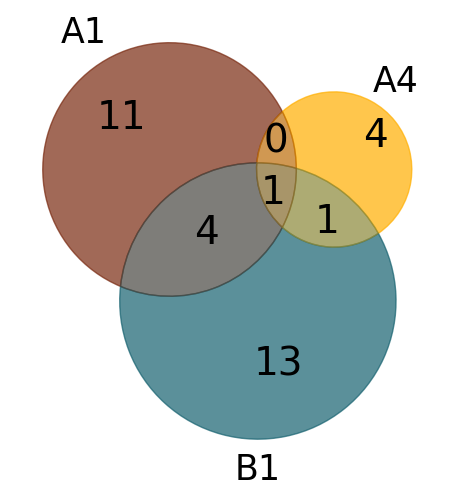

In [656]:
set1 = set(presniff_master_df.index[presniff_master_df['cell group'].str.contains('A1')])
set2 = set(presniff_master_df.index[presniff_master_df['cell group'].str.contains('A4')])
set3 = set(presniff_master_df.index[presniff_master_df['cell group'].str.contains('B1')])

# Plot the Venn diagram
plt.figure(figsize=(8, 6))
venn = venn3([set1, set2, set3], ('A1', 'A4', 'B1'))
venn.get_patch_by_id('100').set_color('#792910')  # Only in Set 1
venn.get_patch_by_id('010').set_color('#FFAF00')  # Only in Set 2
venn.get_patch_by_id('001').set_color('#15616F')  # Only in Set 3
venn.get_patch_by_id('110').set_color('#bc6c08')  # In Set 1 and Set 2
venn.get_patch_by_id('101').set_color('#474640')  # In Set 1 and Set 3
venn.get_patch_by_id('011').set_color('#8a8838')  # In Set 2 and Set 3
venn.get_patch_by_id('111').set_color('#84682a')  # In all Sets

# Optionally, set transparency
for subset in ('100', '010', '001', '110', '101', '011', '111'):
    venn.get_patch_by_id(subset).set_alpha(0.7)

for text in venn.set_labels:
    text.set_fontsize(25)  # Set label font size

for text in venn.subset_labels:
    if text:  # Check if the subset label exists
        text.set_fontsize(28) 
# Show the plot
#plt.title('Presniff vs Sniff Novel', fontsize =24)
plt.savefig('Novel_venn_baseline.png', format='png', dpi=600, transparent = True)
plt.show()

In [657]:
for event in ['A1', 'A2', 'A3', 'A4', 'B1']:
    resultsCage = CageAnalysis.wilcox_baseline_v_event_collection(event, equalize, baseline_window=1, offset=0, save = True, plot = False)

Wilcoxon can't be done on 33_cage_p1_merged.rec A1, because <6 samples
Wilcoxon can't be done on 13_cage_p1_merged.rec A2, because <6 samples
Wilcoxon can't be done on 33_cage_p1_merged.rec A2, because <6 samples
Wilcoxon can't be done on 32_cage_p1_merged.rec A3 79, because baseline = event
Wilcoxon can't be done on 33_cage_p1_merged.rec A3, because <6 samples
Wilcoxon can't be done on 44_cage_p1_merged.rec A3, because <6 samples
Wilcoxon can't be done on 33_cage_p1_merged.rec A4, because <6 samples
Wilcoxon can't be done on 44_cage_p1_merged.rec A4, because <6 samples
Wilcoxon can't be done on 11_cage_p1_merged.rec B1, because <6 samples


In [667]:
batchCage.wilcox_dfs
#print(batchCage.wilcox_dfs.keys())
df_listCage = []
exp = ['A1', 'A2', 'A3', 'A4', 'B1']
for comparison in ['2s Exp1 vs 1s baseline', '2s Exp2 vs 1s baseline', '2s Exp3 vs 1s baseline', '2s Exp4 vs 1s baseline', '2s Exp5 vs 1s baseline']:
    dfCage = batchCage.wilcox_dfs[comparison]

    df_listCage.append(dfCage)

is_first = True 
for dfCage in df_listCage:
    i = 1
    if is_first:
        presniff_master_dfCage = dfCage[['Subject', 'Recording', 'original unit id', 
                            'Event','event1 vs event2']]
        is_first = False
    else: 
        temp_dfCage = dfCage[['Subject', 'Recording', 'original unit id', 
                            'Event', 'event1 vs event2']]
        temp_dfCage.columns = [f'Subject', 'Recording', 'original unit id', 
                            'Event {i}', 'event{i} vs event2']
        presniff_master_dfCage = presniff_master_dfCage.merge(temp_dfCage,  on=['Subject', 'Recording', 'original unit id'], how = 'left', suffixes = ['', exp[i]])
        
        i +=1
presniff_master_dfCage

,Subject,Recording,original unit id,Event,event1 vs event2,Event {i},event{i} vs event2,Event {i}A2,event{i} vs event2A2,Event {i}A2,event{i} vs event2A2,Event {i}A2,event{i} vs event2A2
0,11,11_cage_p1_merged.rec,107,2s Exp1 vs 1s baseline,not significant,2s Exp2 vs 1s baseline,not significant,2s Exp3 vs 1s baseline,not significant,2s Exp4 vs 1s baseline,not significant,NaN,NaN
1,11,11_cage_p1_merged.rec,2,2s Exp1 vs 1s baseline,increases,2s Exp2 vs 1s baseline,not significant,2s Exp3 vs 1s baseline,not significant,2s Exp4 vs 1s baseline,not significant,NaN,NaN
2,11,11_cage_p1_merged.rec,235,2s Exp1 vs 1s baseline,not significant,2s Exp2 vs 1s baseline,not significant,2s Exp3 vs 1s baseline,not significant,2s Exp4 vs 1s baseline,not significant,NaN,NaN
3,11,11_cage_p1_merged.rec,61,2s Exp1 vs 1s baseline,not significant,2s Exp2 vs 1s baseline,not significant,2s Exp3 vs 1s baseline,not significant,2s Exp4 vs 1s baseline,not significant,NaN,NaN
4,11,11_cage_p1_merged.rec,75,2s Exp1 vs 1s baseline,not significant,2s Exp2 vs 1s baseline,not significant,2s Exp3 vs 1s baseline,not significant,2s Exp4 vs 1s baseline,not significant,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,44,44_cage_p1_merged.rec,58,2s Exp1 vs 1s baseline,not significant,2s Exp2 vs 1s baseline,not significant,NaN,NaN,NaN,NaN,2s Exp5 vs 1s baseline,not significant
128,44,44_cage_p1_merged.rec,42,2s Exp1 vs 1s baseline,not significant,2s Exp2 vs 1s baseline,not significant,NaN,NaN,NaN,NaN,2s Exp5 vs 1s baseline,not significant
129,44,44_cage_p1_merged.rec,117,2s Exp1 vs 1s baseline,not significant,2s Exp2 vs 1s baseline,not significant,NaN,NaN,NaN,NaN,2s Exp5 vs 1s baseline,not significant
130,44,44_cage_p1_merged.rec,86,2s Exp1 vs 1s baseline,not significant,2s Exp2 vs 1s baseline,not significant,NaN,NaN,NaN,NaN,2s Exp5 vs 1s baseline,not significant


In [668]:
presniff_master_dfCage.columns = ['Subject',
 'Recording',
 'original unit id',
 'Event_x',
 'A1 vs baseline',
 'Event_y',
 'A2 vs baseline',
 'Event_x1',
 'A3 vs baseline',
 'Event_y1',
 'A4 vs baseline',
 'Event_x2',
 'B1 vs baseline']
presniff_master_dfCage = presniff_master_dfCage[['original unit id',
 'A1 vs baseline',
 'A2 vs baseline',
 'A3 vs baseline',
 'A4 vs baseline',
 'B1 vs baseline']]
presniff_master_dfCage

,original unit id,A1 vs baseline,A2 vs baseline,A3 vs baseline,A4 vs baseline,B1 vs baseline
0,107,not significant,not significant,not significant,not significant,NaN
1,2,increases,not significant,not significant,not significant,NaN
2,235,not significant,not significant,not significant,not significant,NaN
3,61,not significant,not significant,not significant,not significant,NaN
4,75,not significant,not significant,not significant,not significant,NaN
...,...,...,...,...,...,...
127,58,not significant,not significant,NaN,NaN,not significant
128,42,not significant,not significant,NaN,NaN,not significant
129,117,not significant,not significant,NaN,NaN,not significant
130,86,not significant,not significant,NaN,NaN,not significant


In [669]:
def group_cells(Exp1, Exp2, Exp3, Exp4, Exp5, acquisition=None):
    group = ''
    if (Exp1 == 'increases') or (Exp1 == 'decreases'):
        group = 'A1'
    if (Exp2 == 'increases') or (Exp2 == 'decreases'):
        group = group + 'A2' 
    if (Exp3 == 'increases') or (Exp3== 'decreases'):
        group = group + 'A3'
    if (Exp4 == 'increases') or (Exp4 == 'decreases'):
        group = group + 'A4' 
    if (Exp5 == 'increases') or (Exp5== 'decreases'):
        group = group + 'B1'
    if acquisition is not None:
        if (acquisition == 'increases') or (acquisition == 'decreases'):
            group = group + 'acquisition'
    return group

presniff_master_dfCage['cell group'] = presniff_master_dfCage.apply(lambda row: group_cells(row['A1 vs baseline'],
                                                                  row['A2 vs baseline'],
                                                                  row['A3 vs baseline'],
                                                                  row['A4 vs baseline'],
                                                                  row['B1 vs baseline']), axis = 1)
resultsforCage = presniff_master_dfCage.groupby('cell group').count()
resultsforCage

C:\Users\anate\AppData\Local\Temp\ipykernel_22756\3275224572.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  presniff_master_dfCage['cell group'] = presniff_master_dfCage.apply(lambda row: group_cells(row['A1 vs baseline'],


,original unit id,A1 vs baseline,A2 vs baseline,A3 vs baseline,A4 vs baseline,B1 vs baseline
cell group,,,,,,
,98,97,88,84,84,88
A1,10,10,10,8,8,9
A1A2A4B1,1,1,1,1,1,1
A1A4,1,1,1,1,1,1
A1A4B1,1,1,1,1,1,1
A2,5,5,5,4,4,4
A2A3,1,1,1,1,1,1
A2A4,1,1,1,1,1,1
A3A4,1,1,1,1,1,0


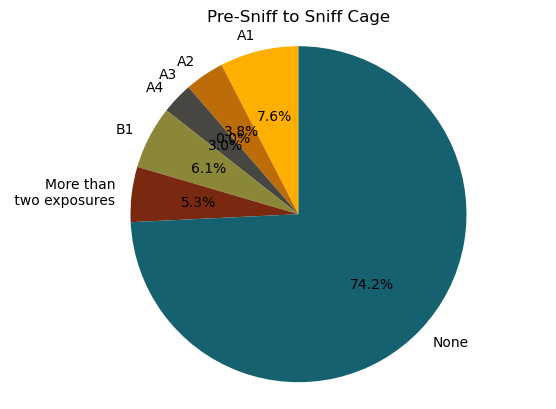

In [670]:
def plot_pie_chart(labels, sizes, title):
    """
    Plot a pie chart.

    Parameters:
    labels (list of str): Labels for each slice of the pie.
    sizes (list of float): Sizes of each slice (should sum to 100%).
    title (str): Title for the pie chart.
    """
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
           colors=[hex_2_rgb('#FFAF00'), hex_2_rgb('#bc6c08'), hex_2_rgb('#84682a'), 
                   hex_2_rgb('#474640'), hex_2_rgb('#8a8838'), hex_2_rgb('#792910'), hex_2_rgb('#15616F')])
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(title)
    plt.show()

# Example usage:
plot_pie_chart(['A1', 'A2', 'A3','A4', 'B1', 'More than\n two exposures', 'None'], 
               [10, 5, 0, 4, 8, 7, 98], 'Pre-Sniff to Sniff Cage')

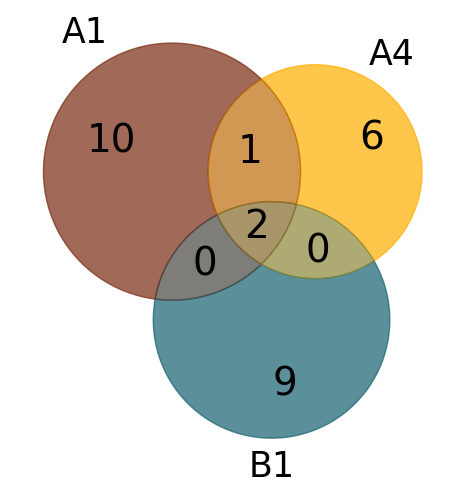

In [673]:
set1 = set(presniff_master_dfCage.index[presniff_master_dfCage['cell group'].str.contains('A1')])
set2 = set(presniff_master_dfCage.index[presniff_master_dfCage['cell group'].str.contains('A4')])
set3 = set(presniff_master_dfCage.index[presniff_master_dfCage['cell group'].str.contains('B1')])

# Plot the Venn diagram
plt.figure(figsize=(8, 6))
venn = venn3([set1, set2, set3], ('A1', 'A4', 'B1'))
venn.get_patch_by_id('100').set_color('#792910')  # Only in Set 1
venn.get_patch_by_id('010').set_color('#FFAF00')  # Only in Set 2
venn.get_patch_by_id('001').set_color('#15616F')  # Only in Set 3
venn.get_patch_by_id('110').set_color('#bc6c08')  # In Set 1 and Set 2
venn.get_patch_by_id('101').set_color('#474640')  # In Set 1 and Set 3
venn.get_patch_by_id('011').set_color('#8a8838')  # In Set 2 and Set 3
venn.get_patch_by_id('111').set_color('#84682a')  # In all Sets

# Optionally, set transparency
for subset in ('100', '010', '001', '110', '101', '011', '111'):
    venn.get_patch_by_id(subset).set_alpha(0.7)

for text in venn.set_labels:
    text.set_fontsize(25)  # Set label font size

for text in venn.subset_labels:
    if text:  # Check if the subset label exists
        text.set_fontsize(28) 
# Show the plot
#plt.title('Presniff vs Sniff Cage', fontsize =24)
plt.savefig('Cage_venn_baseline.png', format='png', dpi=600, transparent = True)
plt.show()

all of the below stuff is for reference for when I tried running 1 animal

In [62]:
subjects = ['subject', 'social_agent', 'No focal subject']
justSub = ['subject']
justSA = ['social_agent']
faceSniff = ['facial sniffing']
allSniff = ['facial sniffing', 'anogenital sniffing']
allogroom = ['allogrooming']

for item in df_list:

    allSniffBoutsSub = boris.get_behavior_bouts(boris_df, justSub, allSniff, 1, 0.5)
    allSniffBoutsSA = boris.get_behavior_bouts(boris_df, justSA, allSniff, 1, 0.5)
    allSniffBouts = boris.get_behavior_bouts(boris_df, subjects, allSniff, 1, 0.5)

#this is an array of all sniff bouts

allogroomBouts = boris.get_behavior_bouts(boris_df, subjects, allogroom, 1, 0.5)

print(allSniffBoutsSub.shape)
allogroomBouts.shape
allSniffBoutsSub
"""
for i, df in enumerate(df_list):
    if 'Behavior' in df.columns:
        result = df[df['Behavior'] == 'mice back in']  # Adjust this condition as needed for each DataFrame
   
    else:
        result = pd.DataFrame()  # No matching rows if no condition is met

     #Print matching rows
    print(f"DataFrame {i} matching rows:\n{result}\n")
"""




(39, 2)


array([[ 606267.,  610133.],
       [ 612267.,  616067.],
       [ 618267.,  623200.],
       [ 625400.,  627000.],
       [ 628133.,  632800.],
       [ 661667.,  663400.],
       [ 688133.,  692200.],
       [ 752200.,  765933.],
       [ 777467.,  781400.],
       [ 966067.,  969267.],
       [ 972733.,  973467.],
       [ 976000.,  977467.],
       [ 984667.,  987866.],
       [1014267., 1019667.],
       [1045933., 1047533.],
       [1119000., 1120867.],
       [1325800., 1327533.],
       [1338800., 1341867.],
       [1343533., 1344400.],
       [1349333., 1350933.],
       [1352533., 1353333.],
       [1355067., 1356667.],
       [1403467., 1404133.],
       [1684267., 1685867.],
       [1689333., 1692467.],
       [1696733., 1698200.],
       [1700533., 1701467.],
       [1703867., 1704600.],
       [1776000., 1776733.],
       [2046267., 2049133.],
       [2050533., 2055867.],
       [2058200., 2060800.],
       [2062067., 2065533.],
       [2070867., 2072532.],
       [207466

In [88]:
#get start and stop times

transitionTimes = ['mice back in', 'mice taken out']
takenOut = ['mice taken out']

putInTimes = boris.get_behavior_bouts(boris_df, subjects, transitionTimes, 0, 0)

print(putInTimes)
exp1StartTime = putInTimes[0][1]
exp1EndTime = putInTimes[1][1]
exp2StartTime = putInTimes[2][1]
exp2EndTime = putInTimes[3][1]
exp3StartTime = putInTimes[4][1]
exp3EndTime = putInTimes[5][1]
exp4StartTime = putInTimes[6][1]
exp4EndTime = putInTimes[7][1]
exp5StartTime = putInTimes[8][1]

exp1StartTime

[[ 602600.  602600.]
 [ 900000.  900000.]
 [ 962400.  962400.]
 [1261133. 1261133.]
 [1323200. 1323200.]
 [1620200. 1620200.]
 [1681800. 1681800.]
 [1980533. 1980533.]
 [2044600. 2044600.]]


602600.0

In [ ]:
#note the above array is in, out, in, out, etc etc. make an in array
#I want to check if sniffing spikes of all bout types are similar 
# 
#okay new plan, more simple task, but I want to compare if neuron activity after any sniff is greater compared to baseline between exp 1 or 4 or exp1 or 5
# okay so sniff_exp1 : [start, stop] ..... [start, stop] (n times)
# then same for sniff_exp4 and sniff_exp5   


#NEVER ITERATE THROUGH A DF, USE THE FILTER. Can intereate through numpy array of behaviors generated earlier, save it into list.append
#make a loop that iterates through boris_df start time column. 
#   current var for current end of exposure, ensure always greater than first in 
#   iterate through the getbehaviorarray you just made. the iterator i will make the last index before you get to the greater time
#   split the array into a new array of sniff_expX . Adjust current car and ensured var

In [55]:
second_hlf = putInTimes[(putInTimes[:,0] > 1620200) & (putInTimes[:,0] < 2044600)]
second_hlf
second_hlf_values = second_hlf[:,0]
second_hlf_values

array([[1681800., 1681800.],
       [1980533., 1980533.]])

In [89]:
#create dictionaries for every exposure sniff that the subject does
sniffExp1Sub = allSniffBoutsSub[(allSniffBoutsSub[:,0] > exp1StartTime) & (allSniffBoutsSub[:,0] < exp1EndTime)]
sniffExp2Sub = allSniffBoutsSub[(allSniffBoutsSub[:,0] > exp2StartTime) & (allSniffBoutsSub[:,0] < exp2EndTime)]
sniffExp3Sub = allSniffBoutsSub[(allSniffBoutsSub[:,0] > exp3StartTime) & (allSniffBoutsSub[:,0] < exp3EndTime)]
sniffExp4Sub = allSniffBoutsSub[(allSniffBoutsSub[:,0] > exp4StartTime) & (allSniffBoutsSub[:,0] < exp4EndTime)]
sniffExp5Sub = allSniffBoutsSub[allSniffBoutsSub[:,0] > exp5StartTime]

print(sniffExp1Sub.shape)
print(sniffExp4Sub.shape)
print(sniffExp5Sub.shape)

dictSniffSub = {'sniffExp1Sub': sniffExp1Sub, 'sniffExp4Sub': sniffExp4Sub, 'sniffExp5Sub': sniffExp5Sub}

dictSniffSub['sniffExp2'] = sniffExp2Sub
dictSniffSub['sniffExp3'] = sniffExp3Sub



(9, 2)
(6, 2)
(10, 2)


In [76]:
phyPath = r"C:\Users\anate\ToManCur\TestingTeehee"

tester = spike.EphysRecordingCollection(phyPath)
print(tester.collection)
tester.collection['24_nov_p1_merged.rec'].subject='2.4'
tester.collection['24_nov_p1_merged.rec'].event_dict=dictSniffSub
testerAnalysis= spike.SpikeAnalysis_MultiRecording(tester, 50, 0.5, 750)


<class 'numpy.ndarray'>
24_nov_p1_merged.rec
Please assign event dictionaries to each recording
as recording.event_dict
event_dict = {event name(str): np.array[[start(ms), stop(ms)]...]
Please assign subjects to each recording as recording.subject


In [77]:
print(tester.collection)

{'24_nov_p1_merged.rec': <multirecording_spikeanalysis.EphysRecording object at 0x00000294308A82C0>}


In [90]:
tester.collection['24_nov_p1_merged.rec'].subject='2.4'
tester.collection['24_nov_p1_merged.rec'].event_dict=dictSniffSub

In [91]:
testerAnalysis= spike.SpikeAnalysis_MultiRecording(tester, 50, 0.5, 750)

All set to analyze


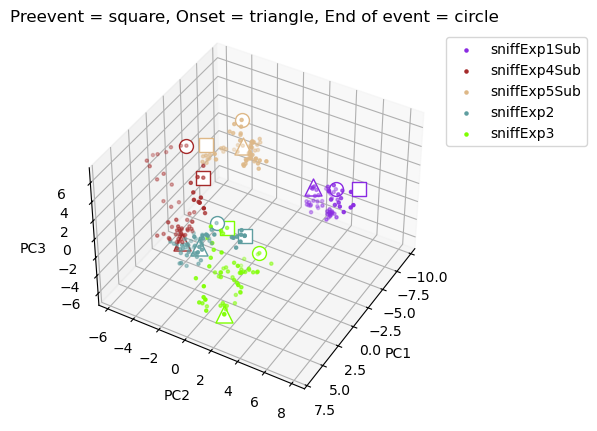

{'raw data':               24_nov_p1_merged.rec  24_nov_p1_merged.rec  \
 sniffExp1Sub             16.888889              6.222222   
 sniffExp1Sub             16.444444              5.777778   
 sniffExp1Sub             16.444444              5.777778   
 sniffExp1Sub             15.555556              5.629630   
 sniffExp1Sub             15.259259              5.777778   
 ...                            ...                   ...   
 sniffExp3                11.238095              6.095238   
 sniffExp3                11.809524              6.476190   
 sniffExp3                12.380952              6.666667   
 sniffExp3                12.000000              6.857143   
 sniffExp3                12.761905              6.476190   
 
               24_nov_p1_merged.rec  24_nov_p1_merged.rec  \
 sniffExp1Sub             25.777778              8.888889   
 sniffExp1Sub             25.481481              8.740741   
 sniffExp1Sub             25.037037              9.333333   
 sniffExp1

In [103]:
#if you didn't initialize subjects or dictionaries or if keys across dictionaries did not match then you would get a different message instead
#of "All set ot analyze"

testerAnalysis.PCA_trajectories(2, 1, 0, d=3, elev = 40)

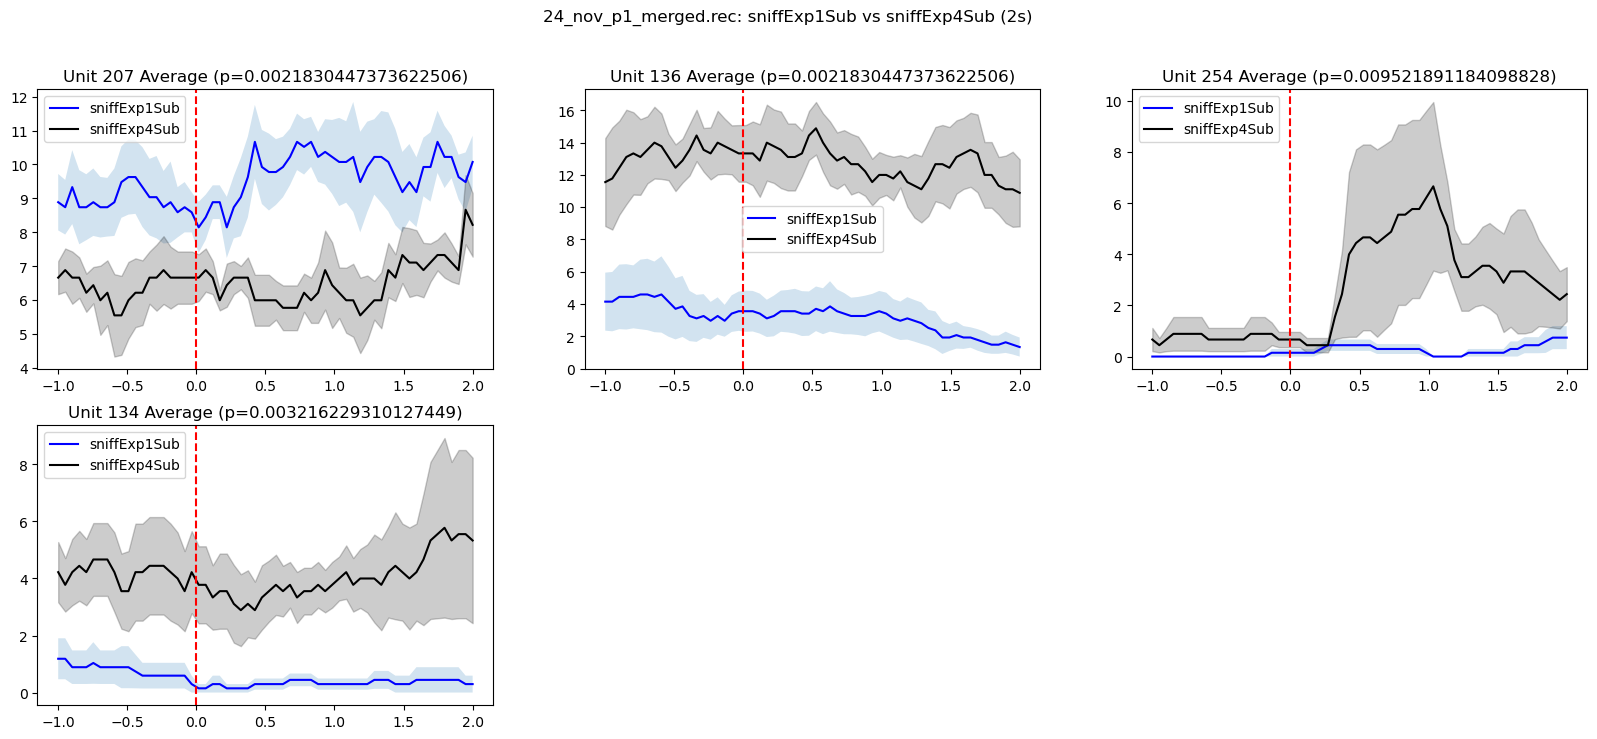

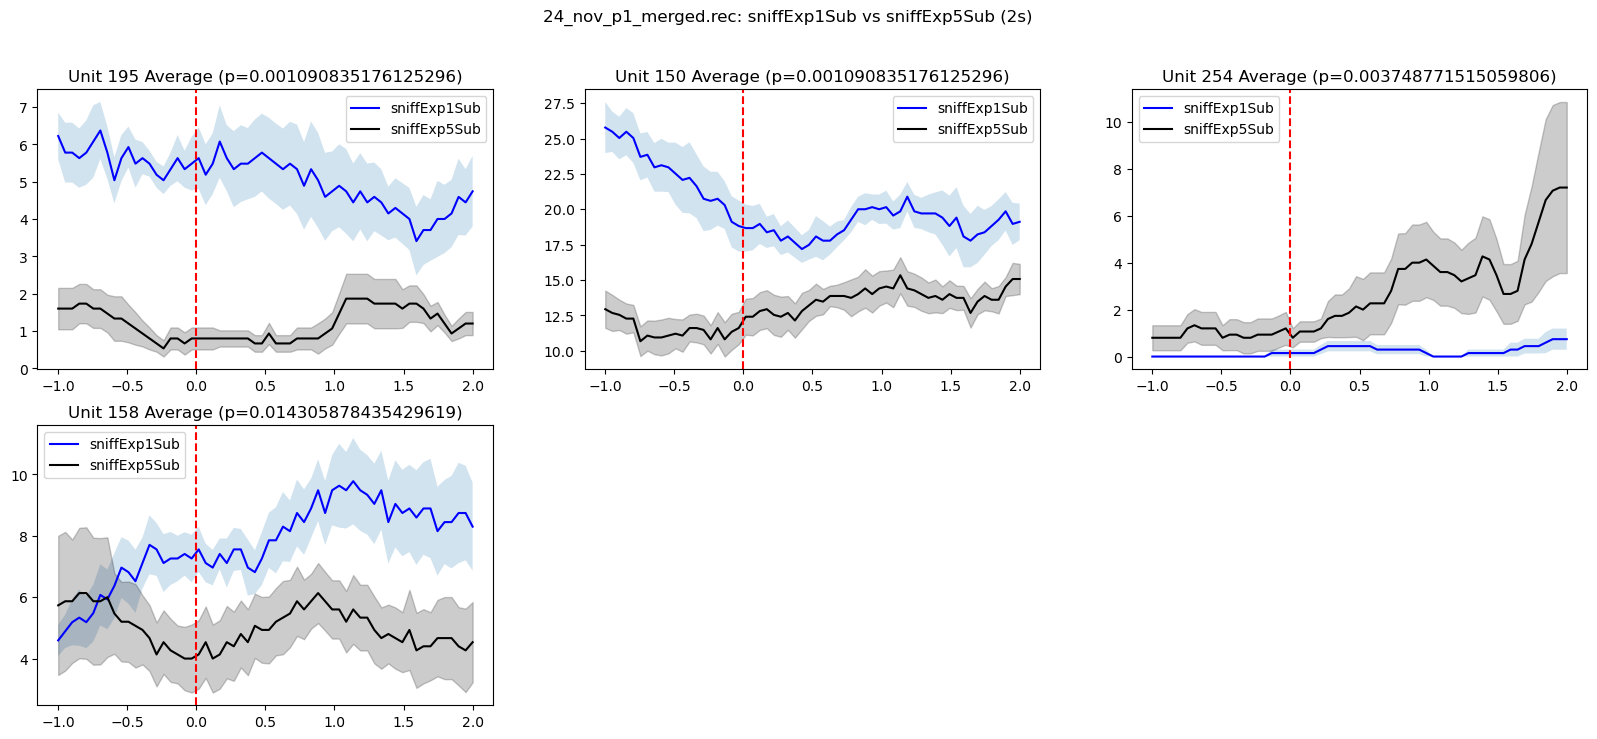

In [101]:
testerAnalysis.wilcox_event_v_event_collection('sniffExp1Sub', 'sniffExp4Sub', 2, 1)
testerAnalysis.wilcox_event_v_event_collection('sniffExp1Sub', 'sniffExp5Sub', 2, 1)

In [111]:
len(tester.collection['24_nov_p1_merged.rec'].unit_spiketrains.keys())


10

In [112]:
tester.collection['24_nov_p1_merged.rec'].freq_dict

{166: 20.558064584806726,
 195: 5.206141085441125,
 150: 17.790994191650608,
 207: 8.782106574235097,
 154: 0.35106217983860577,
 136: 5.055807889208534,
 254: 0.9788741072872074,
 127: 2.588976805573757,
 181: 0.6342181716062404,
 158: 3.935569327509431,
 260: 0.18620816351536756,
 134: 3.060476375575972}

In [105]:
testerAnalysis.__get_unit_event_firing_rates__(tester.collection['24_nov_p1_merged.rec'],'sniffExp1Sub', 2)


{166: [array([21.33333333, 21.33333333, 20.        , 21.33333333, 21.33333333,
         18.66666667, 14.66666667, 13.33333333, 14.66666667, 13.33333333,
         14.66666667, 13.33333333, 12.        , 13.33333333, 16.        ,
         17.33333333, 17.33333333, 18.66666667, 18.66666667, 17.33333333,
         18.66666667, 18.66666667, 18.66666667, 18.66666667, 18.66666667,
         18.66666667, 20.        , 20.        , 18.66666667, 17.33333333,
         16.        , 14.66666667, 13.33333333, 16.        , 17.33333333,
         17.33333333, 16.        , 17.33333333, 17.33333333, 18.66666667]),
  array([13.33333333, 13.33333333, 14.66666667, 13.33333333, 13.33333333,
         12.        , 10.66666667, 10.66666667, 12.        , 10.66666667,
         12.        , 12.        , 12.        , 13.33333333, 13.33333333,
         13.33333333, 13.33333333, 13.33333333, 14.66666667, 16.        ,
         17.33333333, 17.33333333, 17.33333333, 16.        , 16.        ,
         14.66666667, 14.666666

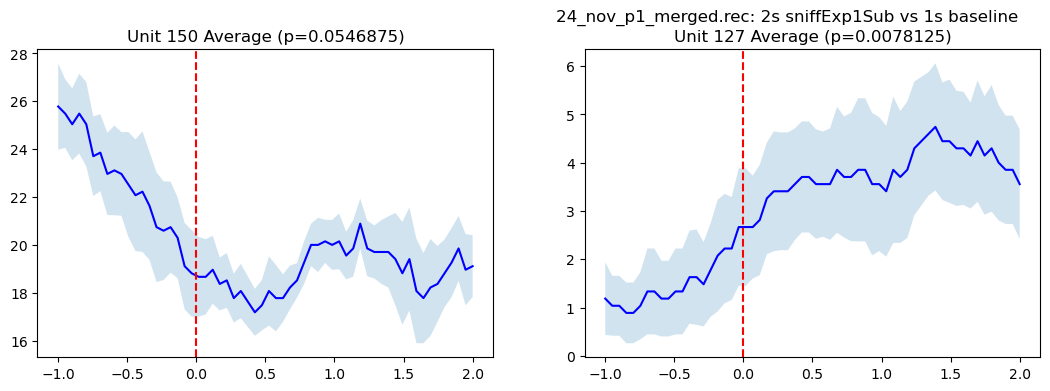

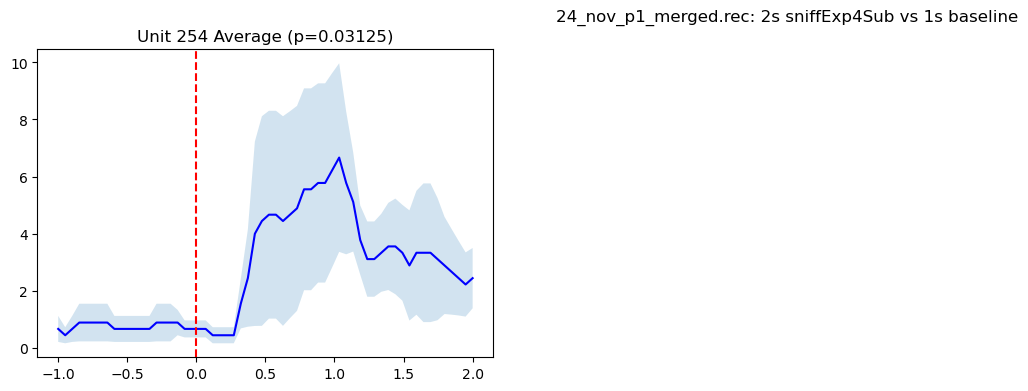

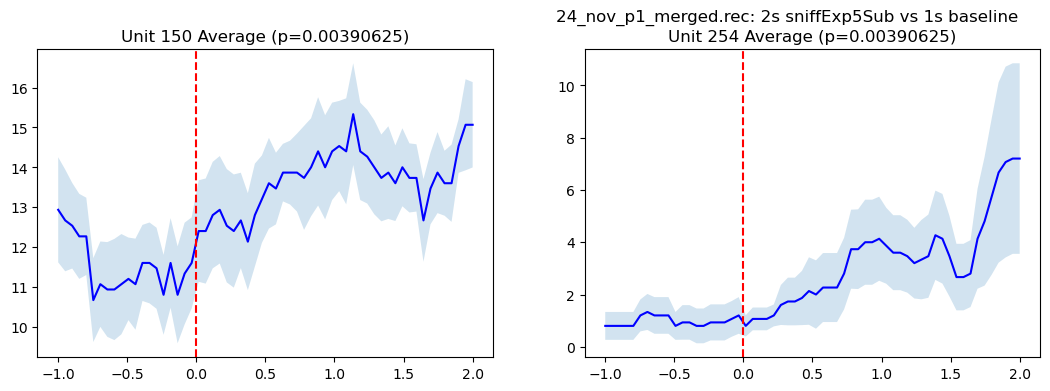

,original unit id,Wilcoxon Stat,p value,event1 vs event2,Recording,Subject,Event
0,166,17.0,0.322266,not significant,24_nov_p1_merged.rec,2.4,2s sniffExp5Sub vs 1s baseline
1,195,26.5,0.921875,not significant,24_nov_p1_merged.rec,2.4,2s sniffExp5Sub vs 1s baseline
2,150,1.0,0.003906,increases,24_nov_p1_merged.rec,2.4,2s sniffExp5Sub vs 1s baseline
3,207,13.0,0.160156,not significant,24_nov_p1_merged.rec,2.4,2s sniffExp5Sub vs 1s baseline
4,136,10.0,0.083984,not significant,24_nov_p1_merged.rec,2.4,2s sniffExp5Sub vs 1s baseline
5,254,0.0,0.003906,decreases,24_nov_p1_merged.rec,2.4,2s sniffExp5Sub vs 1s baseline
6,127,1.0,0.125000,not significant,24_nov_p1_merged.rec,2.4,2s sniffExp5Sub vs 1s baseline
7,181,12.0,0.812500,not significant,24_nov_p1_merged.rec,2.4,2s sniffExp5Sub vs 1s baseline
8,158,25.0,0.845703,not significant,24_nov_p1_merged.rec,2.4,2s sniffExp5Sub vs 1s baseline
9,134,24.0,0.769531,not significant,24_nov_p1_merged.rec,2.4,2s sniffExp5Sub vs 1s baseline


In [108]:
testerAnalysis.wilcox_baseline_v_event_collection('sniffExp1Sub', 2, 1)
testerAnalysis.wilcox_baseline_v_event_collection('sniffExp4Sub', 2, 1)
testerAnalysis.wilcox_baseline_v_event_collection('sniffExp5Sub', 2, 1)

In [ ]:
testerAnalysis.